In [260]:
# Supressing the warnings first
import warnings
warnings.filterwarnings('ignore')

In [261]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [262]:
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

In [263]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn import metrics

In [264]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [265]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## 1. Data understanding,preparation and preprocessing

In [266]:
# Reading the data
df = pd.read_csv('train.csv')
df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [267]:
# Reading the test data
df_test = pd.read_csv('test.csv')
df_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [268]:
df.shape

(69999, 172)

In [269]:
df_test.shape

(30000, 171)

In [270]:
df.info()
#we have 
#135 columns with float datatype
#28 columns with int datatype
#9 columns with Object datatype
#in train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [271]:
#To get an idea of the numeric values, use .describe()
df.describe(include='all')

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count                 69266  69999.000000  69999.000000  69999.000000   
unique                    1           NaN           NaN           NaN   
top               8/31/2014           NaN           NaN           NaN   
freq                  69266           NaN           NaN           NaN   
mean                    NaN    283.134365    278.185912    278.858826   
std                     NaN    334.213918    344.366927    351.924315   
min                     NaN  -2258.709000  -1289.715000   -945.808000   
25%                     NaN     93.581000     86.714000     84.095000   
50%                     NaN    197.484000    191.588000    192.234000   
75%                     NaN    370.791000    365.369500    369.909000   
max                     NaN  27731.088000  35145.834000  33543.624000   

         onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count   67231.000000  67312.000000  66296.000000  67231.000000  67312.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      133.153275    133.894438    132.978257    198.874771    197.153383   
std       299.963093    311.277193    311.896596    316.818355    322.482226   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         7.410000      6.675000      6.410000     34.860000     32.240000   
50%        34.110000     32.280000     32.100000     96.480000     91.885000   
75%       119.390000    115.837500    115.060000    232.990000    227.630000   
max      7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   66296.000000   67231.000000   67312.000000   66296.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean      196.543577       9.765435       7.014568       7.004892   
std       324.089234      57.374429      55.960985      53.408135   
min         0.000000       0.000000       0.000000       0.000000   
25%   

In [272]:
# create column name list by types of columns
id_cols = [ 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df.shape[1])

#ID cols: 1
#Date cols:9
#Numeric cols:156
#Category cols:6
True


In [273]:
# Function to print missing values
def missing_values_in_columns (data_frame, threshold = 0):
    column_with_null_values = round(100* (data_frame.isnull().sum().sort_values(ascending = False)/len(data_frame.index)), 2)
    column_with_null_values = column_with_null_values[column_with_null_values > threshold]
    #print(column_with_null_values)
    print('\n Number of columns with missing values : ', len(column_with_null_values.index))
    return column_with_null_values.to_frame()

In [274]:
#columns with missing value
missing_values_in_columns(df,0)


 Number of columns with missing values :  125


0
arpu_3g_6                 74.90
count_rech_2g_6           74.90
night_pck_user_6          74.90
arpu_2g_6                 74.90
date_of_last_rech_data_6  74.90
total_rech_data_6         74.90
av_rech_amt_data_6        74.90
max_rech_data_6           74.90
count_rech_3g_6           74.90
fb_user_6                 74.90
night_pck_user_7          74.48
date_of_last_rech_data_7  74.48
total_rech_data_7         74.48
max_rech_data_7           74.48
fb_user_7                 74.48
count_rech_2g_7           74.48
count_rech_3g_7           74.48
arpu_3g_7                 74.48
av_rech_amt_data_7        74.48
arpu_2g_7                 74.48
count_rech_2g_8           73.69
av_rech_amt_data_8        73.69
night_pck_user_8          73.69
max_rech_data_8           73.69
total_rech_data_8         73.69
arpu_2g_8                 73.69
arpu_3g_8                 73.69
date_of_last_rech_data_8  73.69
fb_user_8                 73.69
count_rech_3g_8           73.69
isd_og_mou_8               5.29
std_ic_t2o_mou_8           5.29
std_og_t2c_mou_8           5.29
std_ic_t2f_mou_8           5.29
std_og_mou_8               5.29
std_ic_t2m_mou_8           5.29
std_ic_mou_8               5.29
std_ic_t2t_mou_8           5.29
og_others_8                5.29
spl_og_mou_8               5.29
loc_ic_t2m_mou_8           5.29
loc_ic_mou_8               5.29
loc_ic_t2f_mou_8           5.29
std_og_t2f_mou_8           5.29
loc_og_t2c_mou_8           5.29
ic_others_8                5.29
loc_og_mou_8               5.29
onnet_mou_8                5.29
offnet_mou_8               5.29
roam_ic_mou_8              5.29
roam_og_mou_8              5.29
loc_og_t2t_mou_8           5.29
loc_og_t2m_mou_8           5.29
loc_og_t2f_mou_8           5.29
std_og_t2m_mou_8           5.29
loc_ic_t2t_mou_8           5.29
isd_ic_mou_8               5.29
std_og_t2t_mou_8           5.29
spl_ic_mou_8               5.29
std_ic_t2m_mou_6           3.95
std_ic_t2t_mou_6           3.95
loc_ic_t2m_mou_6           3.95
ic_others_6                3.95
loc_ic_mou_6               3.95
std_ic_t2f_mou_6           3.95
isd_ic_mou_6               3.95
std_ic_mou_6               3.95
spl_ic_mou_6               3.95
std_ic_t2o_mou_6           3.95
loc_ic_t2f_mou_6           3.95
isd_og_mou_6               3.95
std_og_t2m_mou_6           3.95
std_og_t2f_mou_6           3.95
loc_og_mou_6               3.95
loc_og_t2c_mou_6           3.95
std_og_t2c_mou_6           3.95
loc_og_t2f_mou_6           3.95
loc_og_t2m_mou_6           3.95
std_og_mou_6               3.95
loc_og_t2t_mou_6           3.95
std_og_t2t_mou_6           3.95
loc_ic_t2t_mou_6           3.95
spl_og_mou_6               3.95
onnet_mou_6                3.95
roam_ic_mou_6              3.95
og_others_6                3.95
roam_og_mou_6              3.95
offnet_mou_6               3.95
roam_og_mou_7              3.84
ic_others_7                3.84
loc_og_mou_7               3.84
onnet_mou_7                3.84
loc_ic_t2t_mou_7           3.84
loc_og_t2f_mou_7           3.84
loc_og_t2c_mou_7           3.84
offnet_mou_7               3.84
loc_og_t2m_mou_7           3.84
roam_ic_mou_7              3.84
std_og_t2t_mou_7           3.84
loc_og_t2t_mou_7           3.84
loc_ic_t2m_mou_7           3.84
isd_ic_mou_7               3.84
loc_ic_t2f_mou_7           3.84
loc_ic_mou_7               3.84
spl_og_mou_7               3.84
std_ic_t2t_mou_7           3.84
isd_og_mou_7               3.84
std_ic_t2m_mou_7           3.84
std_og_mou_7               3.84
std_ic_t2f_mou_7           3.84
std_og_t2m_mou_7           3.84
std_ic_t2o_mou_7           3.84
std_og_t2c_mou_7           3.84
std_ic_mou_7               3.84
std_og_t2f_mou_7           3.84
og_others_7                3.84
spl_ic_mou_7               3.84
date_of_last_rech_8        3.52
date_of_last_rech_7        1.76
date_of_last_rech_6        1.57
last_date_of_month_8       1.05
loc_ic_t2o_mou             1.00
std_og_t2o_mou             1.00
loc_og_t2o_mou             1.00
last_date_of_month_7       0.5

In [275]:
#columns with missing value ,more than 50%
missing_values_in_columns(df,50)


 Number of columns with missing values :  30


0
arpu_3g_6                 74.90
count_rech_2g_6           74.90
night_pck_user_6          74.90
arpu_2g_6                 74.90
date_of_last_rech_data_6  74.90
total_rech_data_6         74.90
av_rech_amt_data_6        74.90
max_rech_data_6           74.90
count_rech_3g_6           74.90
fb_user_6                 74.90
night_pck_user_7          74.48
date_of_last_rech_data_7  74.48
total_rech_data_7         74.48
max_rech_data_7           74.48
fb_user_7                 74.48
count_rech_2g_7           74.48
count_rech_3g_7           74.48
arpu_3g_7                 74.48
av_rech_amt_data_7        74.48
arpu_2g_7                 74.48
count_rech_2g_8           73.69
av_rech_amt_data_8        73.69
night_pck_user_8          73.69
max_rech_data_8           73.69
total_rech_data_8         73.69
arpu_2g_8                 73.69
arpu_3g_8                 73.69
date_of_last_rech_data_8  73.69
fb_user_8                 73.69
count_rech_3g_8           73.69

In [276]:
# The .info() code gives almost the entire information that needs to be inspected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [277]:
# some recharge columns have minimum value of 1, while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'
                 ]

df[recharge_cols].describe(include='all')

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       17568.000000       17865.000000       18417.000000   
mean            2.467612           2.679989           2.652441   
std             2.794610           3.073472           3.101265   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           2.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
count     17568.000000     17865.000000     18417.000000     17568.000000   
mean          1.865323         2.056311         2.016018         0.602288   
std           2.566377         2.799916         2.728246         1.279297   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         1.000000         1.000000         0.000000   
50%           1.000000         1.000000         1.000000         0.000000   
75%           2.000000         2.000000         2.000000         1.000000   
max          42.000000        48.000000        44.000000        29.000000   

       count_rech_3g_7  count_rech_3g_8  max_rech_data_6  max_rech_data_7  \
count     17865.000000     18417.000000     17568.000000     17865.000000   
mean          0.623678         0.636423       126.500000       126.402071   
std           1.401230         1.457058       109.352573       109.459266   
min           0.000000         0.000000         1.000000         1.000000   
25%           0.000000         0.000000        25.000000        25.000000   
50%           0.000000         0.000000       145.000000       145.000000   
75%           1.000000         1.000000       177.000000       177.000000   
max          34.000000        45.000000      1555.000000      1555.000000   

       max_rech_data_8  av_rech_amt_data_6  av_rech_amt_data_7  \
count     18417.000000        17568.000000        17865.000000   
mean        125.374925          192.831096          201.455940   
std         109.648799          190.623115          198.346141   
min           1.000000            1.000000            1.000000   
25%          25.000000           82.000000           92.000000   
50%         145.000000          154.000000          154.000000   
75%         179.000000          252.000000          252.000000   
max        1555.000000         5920.000000         4365.000000   

       av_rech_amt_data_8  
count        18417.000000  
mean           196.815792  
std            192.280532  
min              1.000000  
25%             84.000000  
50%            154.000000  
75%            252.000000  
max           4076.000000

In [278]:
# It is also observed that the recharge date and the recharge value are missing together
#which means the customer didn't recharge
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

total_rech_data_6 date_of_last_rech_data_6
0                 NaN                      NaN
1                 NaN                      NaN
2                 NaN                      NaN
3                 NaN                      NaN
5                 NaN                      NaN
6                 NaN                      NaN
8                 NaN                      NaN
9                 NaN                      NaN
11                NaN                      NaN
12                NaN                      NaN
13                NaN                      NaN
14                NaN                      NaN
17                NaN                      NaN
18                NaN                      NaN
19                NaN                      NaN
20                NaN                      NaN
21                NaN                      NaN
22                NaN                      NaN
23                NaN                      NaN
25                NaN                      NaN

In [279]:
#In the recharge variables where minumum value is 1,
#we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [280]:
print(df.shape)
print(df_test.shape)

(69999, 172)
(30000, 171)


## Impute missing values

In [281]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]
# impute missing values with 0
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [282]:
df_test[zero_impute]=df_test[zero_impute].apply(lambda x:x.fillna(0))

In [283]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(df[zero_impute].isnull().sum()*100/df.shape[1])



Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


In [284]:
#checking the summary now
df[zero_impute].describe(include='all')

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        69999.000000        69999.000000        69999.000000   
mean            48.395787           51.415168           51.782975   
std            126.923180          133.246541          131.291162   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              8.000000           17.000000           23.000000   
max           5920.000000         4365.000000         4076.000000   

       max_rech_data_6  max_rech_data_7  max_rech_data_8  
count     69999.000000     69999.000000     69999.000000  
mean         31.748339        32.260075        32.986614  
std          77.519536        78.069163        78.808337  
min           0.000000         0.000000         0.000000  
25%           0.000000         0.000000         0.000000  
50%           0.000000         0.000000         0.000000  
75%           8.000000        14.000000        17.000000  
max        1555.000000      1555.000000      1555.000000

In [285]:
# drop id and date columns
print("Shape before dropping: ", df.shape)
churn = df.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 162)


In [286]:
missing_values_in_columns(churn)


 Number of columns with missing values :  108


0
fb_user_6         74.90
arpu_3g_6         74.90
count_rech_3g_6   74.90
count_rech_2g_6   74.90
night_pck_user_6  74.90
arpu_2g_6         74.90
arpu_2g_7         74.48
count_rech_3g_7   74.48
night_pck_user_7  74.48
count_rech_2g_7   74.48
fb_user_7         74.48
arpu_3g_7         74.48
night_pck_user_8  73.69
fb_user_8         73.69
arpu_2g_8         73.69
arpu_3g_8         73.69
count_rech_2g_8   73.69
count_rech_3g_8   73.69
std_og_t2m_mou_8   5.29
loc_ic_mou_8       5.29
std_ic_t2m_mou_8   5.29
std_og_t2f_mou_8   5.29
std_ic_t2t_mou_8   5.29
std_og_t2c_mou_8   5.29
std_ic_t2f_mou_8   5.29
std_og_mou_8       5.29
loc_ic_t2f_mou_8   5.29
isd_og_mou_8       5.29
loc_ic_t2m_mou_8   5.29
std_ic_t2o_mou_8   5.29
loc_ic_t2t_mou_8   5.29
spl_og_mou_8       5.29
std_og_t2t_mou_8   5.29
og_others_8        5.29
loc_og_t2m_mou_8   5.29
ic_others_8        5.29
std_ic_mou_8       5.29
onnet_mou_8        5.29
loc_og_t2c_mou_8   5.29
spl_ic_mou_8       5.29
offnet_mou_8       5.29
loc_og_t2f_mou_8   5.29
roam_ic_mou_8      5.29
roam_og_mou_8      5.29
isd_ic_mou_8       5.29
loc_og_mou_8       5.29
loc_og_t2t_mou_8   5.29
loc_ic_t2t_mou_6   3.95
loc_ic_t2f_mou_6   3.95
std_ic_mou_6       3.95
ic_others_6        3.95
loc_ic_mou_6       3.95
std_ic_t2t_mou_6   3.95
isd_ic_mou_6       3.95
std_ic_t2m_mou_6   3.95
std_ic_t2f_mou_6   3.95
std_ic_t2o_mou_6   3.95
spl_ic_mou_6       3.95
loc_ic_t2m_mou_6   3.95
loc_og_t2c_mou_6   3.95
isd_og_mou_6       3.95
std_og_t2t_mou_6   3.95
std_og_t2m_mou_6   3.95
std_og_t2f_mou_6   3.95
loc_og_t2f_mou_6   3.95
std_og_t2c_mou_6   3.95
loc_og_mou_6       3.95
std_og_mou_6       3.95
onnet_mou_6        3.95
loc_og_t2m_mou_6   3.95
roam_og_mou_6      3.95
og_others_6        3.95
spl_og_mou_6       3.95
roam_ic_mou_6      3.95
loc_og_t2t_mou_6   3.95
offnet_mou_6       3.95
loc_og_t2f_mou_7   3.84
loc_og_t2c_mou_7   3.84
spl_ic_mou_7       3.84
og_others_7        3.84
onnet_mou_7        3.84
isd_ic_mou_7       3.84
roam_ic_mou_7      3.84
loc_og_t2m_mou_7   3.84
ic_others_7        3.84
offnet_mou_7       3.84
loc_og_t2t_mou_7   3.84
std_ic_mou_7       3.84
loc_og_mou_7       3.84
std_ic_t2t_mou_7   3.84
loc_ic_t2t_mou_7   3.84
spl_og_mou_7       3.84
loc_ic_t2m_mou_7   3.84
isd_og_mou_7       3.84
loc_ic_t2f_mou_7   3.84
std_og_mou_7       3.84
loc_ic_mou_7       3.84
std_og_t2c_mou_7   3.84
roam_og_mou_7      3.84
std_og_t2f_mou_7   3.84
std_ic_t2m_mou_7   3.84
std_og_t2m_mou_7   3.84
std_ic_t2f_mou_7   3.84
std_ic_t2o_mou_7   3.84
std_og_t2t_mou_7   3.84
loc_og_t2o_mou     1.00
std_og_t2o_mou     1.00
loc_ic_t2o_mou     1.00

In [287]:
#Impute Categorical variables
for c in churn[cat_cols]:
    print ("---- %s ---" % c)
    print (churn[c].value_counts())
    print("Missing values")
    print(churn[c].isnull().sum() * 100 / len(churn))

---- night_pck_user_6 ---
0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64
Missing values
74.90249860712296
---- night_pck_user_7 ---
0.0    17435
1.0      430
Name: night_pck_user_7, dtype: int64
Missing values
74.47820683152617
---- night_pck_user_8 ---
0.0    18030
1.0      387
Name: night_pck_user_8, dtype: int64
Missing values
73.68962413748768
---- fb_user_6 ---
1.0    16098
0.0     1470
Name: fb_user_6, dtype: int64
Missing values
74.90249860712296
---- fb_user_7 ---
1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64
Missing values
74.47820683152617
---- fb_user_8 ---
1.0    16397
0.0     2020
Name: fb_user_8, dtype: int64
Missing values
73.68962413748768


In [288]:
#Lets impute missing values with -1, and consider -1 as new category
# replace missing values with '-1' in categorical columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [289]:
#Impute Categorical variables
for c in churn[cat_cols]:
    print ("---- %s ---" % c)
    print (churn[c].value_counts())
    print("Missing values")
    print(churn[c].isnull().sum() * 100 / len(churn))

---- night_pck_user_6 ---
-1.0    52431
 0.0    17124
 1.0      444
Name: night_pck_user_6, dtype: int64
Missing values
0.0
---- night_pck_user_7 ---
-1.0    52134
 0.0    17435
 1.0      430
Name: night_pck_user_7, dtype: int64
Missing values
0.0
---- night_pck_user_8 ---
-1.0    51582
 0.0    18030
 1.0      387
Name: night_pck_user_8, dtype: int64
Missing values
0.0
---- fb_user_6 ---
-1.0    52431
 1.0    16098
 0.0     1470
Name: fb_user_6, dtype: int64
Missing values
0.0
---- fb_user_7 ---
-1.0    52134
 1.0    16249
 0.0     1616
Name: fb_user_7, dtype: int64
Missing values
0.0
---- fb_user_8 ---
-1.0    51582
 1.0    16397
 0.0     2020
Name: fb_user_8, dtype: int64
Missing values
0.0


In [290]:
# Drop variables with more than a given threshold of missing values,0.7
initial_cols = churn.shape[1]

include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < 0.7 else False))

drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

features  include
0                    id     True
1        loc_og_t2o_mou     True
2        std_og_t2o_mou     True
3        loc_ic_t2o_mou     True
4                arpu_6     True
5                arpu_7     True
6                arpu_8     True
7           onnet_mou_6     True
8           onnet_mou_7     True
9           onnet_mou_8     True
10         offnet_mou_6     True
11         offnet_mou_7     True
12         offnet_mou_8     True
13        roam_ic_mou_6     True
14        roam_ic_mou_7     True
15        roam_ic_mou_8     True
16        roam_og_mou_6     True
17        roam_og_mou_7     True
18        roam_og_mou_8     True
19     loc_og_t2t_mou_6     True
20     loc_og_t2t_mou_7     True
21     loc_og_t2t_mou_8     True
22     loc_og_t2m_mou_6     True
23     loc_og_t2m_mou_7     True
24     loc_og_t2m_mou_8     True
25     loc_og_t2f_mou_6     True
26     loc_og_t2f_mou_7     True
27     loc_og_t2f_mou_8     True
28     loc_og_t2c_mou_6     True
29     loc_og_t2c_mou_7     True
30     loc_og_t2c_mou_8     True
31         loc_og_mou_6     True
32         loc_og_mou_7     True
33         loc_og_mou_8     True
34     std_og_t2t_mou_6     True
35     std_og_t2t_mou_7     True
36     std_og_t2t_mou_8     True
37     std_og_t2m_mou_6     True
38     std_og_t2m_mou_7     True
39     std_og_t2m_mou_8     True
40     std_og_t2f_mou_6     True
41     std_og_t2f_mou_7     True
42     std_og_t2f_mou_8     True
43     std_og_t2c_mou_6     True
44     std_og_t2c_mou_7     True
45     std_og_t2c_mou_8     True
46         std_og_mou_6     True
47         std_og_mou_7     True
48         std_og_mou_8     True
49         isd_og_mou_6     True
50         isd_og_mou_7     True
51         isd_og_mou_8     True
52         spl_og_mou_6     True
53         spl_og_mou_7     True
54         spl_og_mou_8     True
55          og_others_6     True
56          og_others_7     True
57          og_others_8     True
58       total_og_mou_6     True
59       total_og_mou_7     True
60       total_og_mou_8     True
61     loc_ic_t2t_mou_6     True
62     loc_ic_t2t_mou_7     True
63     loc_ic_t2t_mou_8     True
64     loc_ic_t2m_mou_6     True
65     loc_ic_t2m_mou_7     True
66     loc_ic_t2m_mou_8     True
67     loc_ic_t2f_mou_6     True
68     loc_ic_t2f_mou_7     True
69     loc_ic_t2f_mou_8     True
70         loc_ic_mou_6     True
71         loc_ic_mou_7     True
72         loc_ic_mou_8     True
73     std_ic_t2t_mou_6     True
74     std_ic_t2t_mou_7     True
75     std_ic_t2t_mou_8     True
76     std_ic_t2m_mou_6     True
77     std_ic_t2m_mou_7     True
78     std_ic_t2m_mou_8     True
79     std_ic_t2f_mou_6     True
80     std_ic_t2f_mou_7     True
81     std_ic_t2f_mou_8     True
82     std_ic_t2o_mou_6     True
83     std_ic_t2o_mou_7     True
84     std_ic_t2o_mou_8     True
85         std_ic_mou_6     True
86         std_ic_mou_7     True
87         std_ic_mou_8     True
88       total_ic_mou_6     True
89       total_ic_mou_7     True
90       total_ic_mou_8     True
91         spl_ic_mou_6     True
92         spl_ic_mou_7     True
93         spl_ic_mou_8     True
94         isd_ic_mou_6     True
95         isd_ic_mou_7     True
96         isd_ic_mou_8     True
97          ic_others_6     True
98          ic_others_7     True
99          ic_others_8     True
100    total_rech_num_6     True
101    total_rech_num_7     True
102    total_rech_num_8     True
103    total_rech_amt_6     True
104    total_rech_amt_7     True
105    total_rech_amt_8     True
106      max_rech_amt_6     True
107      max_rech_amt_7     True
108      max_rech_amt_8     True
109  last_day_rch_amt_6     True
110  last_day_rch_amt_7     True
111  last_day_rch_amt_8     True
112   total_rech_data_6     True
113   total_rech_data_7     True
114   total_rech_data_8     True
115     max_rech_data_6     True
116     max_rech_data_7     True
117     max_rech_data_8     True
124  av_rech_amt_data_6     True
125  av_rech_amt_data_7     True
126  av_rech_amt_data_

In [291]:
# drop columns in train set
churn = churn.loc[:, include_cols]

dropped_cols = churn.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-12 columns dropped.


In [292]:
churn.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
0   0             0.0             0.0             0.0   31.277   87.009   
1   1             0.0             0.0             0.0    0.000  122.787   
2   2             0.0             0.0             0.0   60.806  103.176   
3   3             0.0             0.0             0.0  156.362  205.260   
4   4             0.0             0.0             0.0  240.708  128.191   

    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0    7.527        48.58       124.38         1.29         32.24         96.68   
1   42.953         0.00         0.00         0.00          0.00         25.99   
2    0.000         0.53        15.93         0.00         53.99         82.05   
3  111.095         7.26        16.01         0.00         68.76         78.48   
4  101.565        21.28         4.83         6.13         56.99         38.11   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          2.33           0.00            0.0            0.0           0.00   
1         30.89           0.00            0.0            0.0           0.00   
2          0.00           0.00            0.0            0.0           0.00   
3         50.23           0.00            0.0            0.0           0.00   
4          9.63          53.64            0.0            0.0          15.73   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.0           0.00              2.23              0.00   
1            0.0           0.00              0.00              0.00   
2            0.0           0.00              0.53             12.98   
3            0.0           1.63              6.99              3.94   
4            0.0           0.00             10.16              4.83   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.28              5.29             16.04              2.33   
1              0.00              0.00              0.00              0.00   
2              0.00             24.11              0.00              0.00   
3              0.00             37.91             44.89             23.63   
4              6.13             36.74             19.88              4.61   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              2.14   
3              0.00              0.00              0.00              0.00   
4             11.99              1.23              5.01              0.00   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00          7.53         16.04   
1             22.01             29.79          0.00          0.00   
2              0.00              0.00         24.64         12.98   
3              0.00              8.03         44.91         48.84   
4              9.85              0.00         58.91         25.94   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          2.61             46.34            124.38              1.01   
1          0.00              0.00              0.00              0.00   
2          0.00              0.00              2.94              0.00   
3         23.63              0.26             12.06              0.00   
4         15.76              0.00              0.00              0.00   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0             18.75             80.61               0.0              0.00   
1              0.00              0.00               0.0              0.00   
2             28.94             82.05               0.0              0.00   
3             15.33             25.93               4.6              0.56  

In [293]:

# drop columns in test set
df_test = df_test[churn.columns.drop('churn_probability')]
df_test.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
0  69999             0.0             0.0             0.0   91.882   65.330   
1  70000             0.0             0.0             0.0  414.168  515.568   
2  70001             0.0             0.0             0.0  329.844  434.884   
3  70002             0.0             0.0             0.0   43.550  171.390   
4  70003             0.0             0.0             0.0  306.854  406.289   

    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0   64.445        31.78        20.23        23.11         60.16         32.16   
1  360.868        75.51        41.21        19.84        474.34        621.84   
2  746.239         7.54         7.86         8.40         16.98         45.81   
3   24.400         5.31         2.16         0.00         40.04        205.01   
4  413.329       450.93       609.03       700.68         60.94         23.84   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0         34.83           0.00           0.00           0.00           0.00   
1        394.94           0.00           0.00           0.00           0.00   
2         45.04          22.81         103.38          26.08          24.53   
3         24.01           0.00           0.00           0.00           0.00   
4         74.16           0.00           0.00           0.00           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00           0.00             24.88             20.23   
1           0.00           0.00             75.51             41.21   
2          53.68          54.44              0.00              0.00   
3           0.00           0.00              5.31              0.00   
4           0.00           0.00              0.45              0.78   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             21.06             18.13             10.89              8.36   
1             19.84            473.61            598.08            377.26   
2              0.00              0.00              0.00              0.00   
3              0.00              2.94             98.61             20.51   
4             14.56              2.39              2.66             10.94   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              0.00             13.58              0.00               0.0   
1              0.73              0.00              0.00               0.0   
2              0.00              0.00              0.00               0.0   
3              0.00              0.00              2.35               0.0   
4              0.00              0.00              0.00               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.03         43.01         44.71   
1              0.00              0.00        549.86        639.29   
2              0.00              0.00          0.00          0.00   
3              6.18              0.00          8.26         98.61   
4              0.00              0.00          2.84          3.44   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0         29.43              6.90              0.00              2.05   
1        397.11              0.00              0.00              0.00   
2          0.00              0.00              0.00              0.00   
3         22.86              0.00              2.16              0.00   
4         25.51            450.48            608.24            686.11   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0             42.03              7.68             26.43               0.0   
1              0.00             23.76             17.68               0.0   
2              0.00              0.00              0.00               0.0   
3             37.09             94.36              0.00     

In [294]:
print(churn.shape)
print(df_test.shape)

(69999, 150)
(30000, 149)


In [295]:
# Select the object column data types & missing values and impute the non numerica values with zero
obect_columns = churn.select_dtypes(include='object').columns.tolist()

# selected the columns with missing values
columns_with_missing_values = missing_values_in_columns(churn)
columns_with_missing_values = list(columns_with_missing_values.index)


 Number of columns with missing values :  90


In [296]:
telecom_data_cols_na = []
for column in columns_with_missing_values:
    if (column not in obect_columns): 
        churn[column].fillna(0, inplace=True)
        df_test[column].fillna(0, inplace=True)

In [297]:
missing_values_in_columns(churn)


 Number of columns with missing values :  0


Empty DataFrame
Columns: [0]
Index: []

### Drop the columns with zero variance

In [298]:
# Function to print columns with zero variance
def print_columns_with_zero_variance(data_frame, variance = 0):
    data_frame_with_variance = pd.DataFrame(data_frame.var())
    data_frame_with_variance.columns = ['variance']
    print(data_frame_with_variance[data_frame_with_variance['variance'] == variance])

In [299]:
# check for columns with zero variance and remove it
print_columns_with_zero_variance(churn)

                  variance
loc_og_t2o_mou         0.0
std_og_t2o_mou         0.0
loc_ic_t2o_mou         0.0
std_og_t2c_mou_6       0.0
std_og_t2c_mou_7       0.0
std_og_t2c_mou_8       0.0
std_ic_t2o_mou_6       0.0
std_ic_t2o_mou_7       0.0
std_ic_t2o_mou_8       0.0


In [300]:
cols_with_0_var = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
cols_with_0_var = cols_with_0_var + ['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8']
cols_with_0_var = cols_with_0_var + ['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

churn.drop(cols_with_0_var, axis=1, inplace = True)
df_test.drop(cols_with_0_var, axis=1, inplace = True)

In [301]:
# check for columns with zero variance and remove it
print_columns_with_zero_variance(churn)

Empty DataFrame
Columns: [variance]
Index: []


In [302]:
churn.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [303]:
print(churn.shape)
print(df_test.shape)

(69999, 141)
(30000, 140)


In [304]:
# Check the unique values across each column to find the variation in dataset
churn.nunique()


id                    69999
arpu_6                61615
arpu_7                61425
arpu_8                60194
onnet_mou_6           20057
onnet_mou_7           20076
onnet_mou_8           19725
offnet_mou_6          26254
offnet_mou_7          26139
offnet_mou_8          25995
roam_ic_mou_6          5306
roam_ic_mou_7          4240
roam_ic_mou_8          4252
roam_og_mou_6          6568
roam_og_mou_7          5305
roam_og_mou_8          5215
loc_og_t2t_mou_6      11491
loc_og_t2t_mou_7      11359
loc_og_t2t_mou_8      11296
loc_og_t2m_mou_6      17848
loc_og_t2m_mou_7      17641
loc_og_t2m_mou_8      17616
loc_og_t2f_mou_6       3376
loc_og_t2f_mou_7       3365
loc_og_t2f_mou_8       3311
loc_og_t2c_mou_6       1945
loc_og_t2c_mou_7       2103
loc_og_t2c_mou_8       2204
loc_og_mou_6          22309
loc_og_mou_7          22012
loc_og_mou_8          21950
std_og_t2t_mou_6      14554
std_og_t2t_mou_7      14745
std_og_t2t_mou_8      14483
std_og_t2m_mou_6      16059
std_og_t2m_mou_7    

In [305]:
#Columns with low variance
columns_with_less_variance = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
columns_with_less_variance = columns_with_less_variance + ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
columns_with_less_variance = columns_with_less_variance + ['fb_user_6', 'fb_user_7', 'fb_user_8']

In [306]:
#Not required as they can be explained by other columns
not_required_columns=['onnet_mou_6','onnet_mou_7','onnet_mou_8',
                     'offnet_mou_6','offnet_mou_7','offnet_mou_8']

In [307]:
churn.drop(columns_with_less_variance+not_required_columns,axis=1,inplace=True)

In [308]:
#doing same with test set
df_test.drop(columns_with_less_variance+not_required_columns,axis=1,inplace=True)

In [309]:
print(churn.shape)
print(df_test.shape)

(69999, 126)
(30000, 125)


In [310]:
print('telecom data set size ', churn.shape)

telecom data set size  (69999, 126)


## 2. Feature Engineering (Derive new feature and drop unwanted features)


### Filter high value customer

In [311]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7
churn['total_data_rech_8'] = churn.total_rech_data_8* churn.av_rech_amt_data_8

#same changes on test set
df_test['total_data_rech_6'] = df_test.total_rech_data_6 * df_test.av_rech_amt_data_6
df_test['total_data_rech_7'] = df_test.total_rech_data_7 * df_test.av_rech_amt_data_7
df_test['total_data_rech_8'] = df_test.total_rech_data_8* df_test.av_rech_amt_data_8

In [312]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7
churn['amt_data_8'] = churn.total_rech_amt_8 + churn.total_data_rech_8

#same on test set
df_test['amt_data_6'] = df_test.total_rech_amt_6 + df_test.total_data_rech_6
df_test['amt_data_7'] = df_test.total_rech_amt_7 + df_test.total_data_rech_7
df_test['amt_data_8'] = df_test.total_rech_amt_8 + df_test.total_data_rech_8

In [313]:
# calculate average recharge done by customer in June and July
churn['av_amt_data_6_7_8'] = (churn.amt_data_6 + churn.amt_data_7 +churn.amt_data_8)/3

#same on test set
df_test['av_amt_data_6_7_8'] = (df_test.amt_data_6 + df_test.amt_data_7 +df_test.amt_data_8)/3

In [314]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7_8.quantile(0.7)))

Recharge amount at 70th percentile: 484.3333333333333


In [315]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.av_amt_data_6_7_8 >= churn.av_amt_data_6_7_8.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(21001, 133)

In [316]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7','total_data_rech_8',
                                      'amt_data_6', 'amt_data_7','amt_data_8', 'av_amt_data_6_7_8'], axis=1)
churn_filtered.shape

(21001, 126)

In [317]:
#do the same for tset set
df_test = df_test.drop(['total_data_rech_6', 'total_data_rech_7','total_data_rech_8',
                                      'amt_data_6', 'amt_data_7','amt_data_8', 'av_amt_data_6_7_8'], axis=1)
df_test.shape

(30000, 125)

In [318]:
# Check the unique values across each column to find the variation in dataset
churn_filtered.nunique()

id                    21001
arpu_6                20280
arpu_7                20440
arpu_8                20248
roam_ic_mou_6          3110
roam_ic_mou_7          2534
roam_ic_mou_8          2596
roam_og_mou_6          3559
roam_og_mou_7          2853
roam_og_mou_8          2980
loc_og_t2t_mou_6       8370
loc_og_t2t_mou_7       8479
loc_og_t2t_mou_8       8372
loc_og_t2m_mou_6      12259
loc_og_t2m_mou_7      12338
loc_og_t2m_mou_8      12295
loc_og_t2f_mou_6       2607
loc_og_t2f_mou_7       2628
loc_og_t2f_mou_8       2581
loc_og_t2c_mou_6       1413
loc_og_t2c_mou_7       1480
loc_og_t2c_mou_8       1520
loc_og_mou_6          13921
loc_og_mou_7          14162
loc_og_mou_8          13974
std_og_t2t_mou_6       8105
std_og_t2t_mou_7       8448
std_og_t2t_mou_8       8128
std_og_t2m_mou_6       9554
std_og_t2m_mou_7       9774
std_og_t2m_mou_8       9476
std_og_t2f_mou_6       1296
std_og_t2f_mou_7       1259
std_og_t2f_mou_8       1260
std_og_mou_6          11537
std_og_mou_7        

In [319]:
#more non required variables as they can be explained by other variables
not_required=['total_rech_num_6','total_rech_num_7','total_rech_num_8',
             'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8',
             'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8',
             'sachet_2g_6','sachet_2g_7','sachet_2g_8',
             'monthly_3g_6','monthly_3g_7','monthly_3g_8',
             'sachet_3g_6','sachet_3g_7','sachet_3g_8',
             ]
churn_filtered.drop(not_required,axis=1,inplace=True)

#doing same in set set
df_test.drop(not_required,axis=1,inplace=True)

In [320]:
#We're left with 21001 rows after selecting the customers 
#who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

In [321]:
print(churn_filtered.shape)
print(df_test.shape)

(21001, 108)
(30000, 107)


In [322]:
# 0 - not churn, 1 - churn
churn_filtered['churn']=churn_filtered.churn_probability
churn_filtered.drop('churn_probability',axis=1,inplace=True)


In [323]:
churn_filtered.shape

(21001, 108)

In [324]:
churn_filtered.churn.value_counts()

0    19744
1     1257
Name: churn, dtype: int64

In [325]:
# change data type to category
churn_filtered.churn = churn_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
0    94.014571
1     5.985429
Name: churn, dtype: float64


In [326]:
#As we can see its imbalanced dataset with only 5.9% churned customers

In [327]:
print(churn_filtered.shape)
print(df_test.shape)

(21001, 108)
(30000, 107)


## Visualize data

In [328]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [329]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21001 entries, 0 to 21000
Columns: 108 entries, id to churn
dtypes: category(1), float64(102), int64(5)
memory usage: 17.2 MB


In [330]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21001 entries, 0 to 21000
Columns: 108 entries, id to churn
dtypes: category(1), float64(102), int64(5)
memory usage: 17.2 MB


In [331]:
def EDA():
    column_Month_6=churn_filtered.filter(like='6').columns
    for count, eachFeature in enumerate(column_Month_6):
        col = eachFeature
        X1 = churn_filtered.groupby(['churn'])[col].agg(['mean']).reset_index()
        X1.rename(columns={'mean': "mean_"+col}, inplace=True)
        
        col = col[:-1] + "7"
        X2 = churn_filtered.groupby(['churn'])[col].agg(['mean']).reset_index()
        X2.rename(columns={'mean': "mean_"+col}, inplace=True)
       
        col = col[:-1] + "8"
        X3 = churn_filtered.groupby(['churn'])[col].agg(['mean']).reset_index()
        X3.rename(columns={'mean': "mean_"+col}, inplace=True)

        X1 = pd.merge(X1, X2, on = ['churn'])
        X1 = pd.merge(X1,X3, on = ['churn'])
        X1.head()
        X1 = X1.transpose().reset_index()
        X1 = X1.loc[1:]
        X1.columns = ['Feature', 'Not-Churn', 'Churn']
        #X1.head()
        X1['Usage%_During_Churn'] = round((X1['Churn']/(X1['Not-Churn'] + X1['Churn']))*100,2)
        print(X1.head())
        plt.figure(figsize=(12, 6))
        ax = plt.subplot(111)
        p = sns.barplot(x='Feature', y='Usage%_During_Churn', data=X1)
        p.set_xticklabels(p.get_xticklabels(),rotation=45)
        plt.title('Churn subscriber usage to Total Usage % for {}'.format(col[:-2]), fontsize = 12)
        X1.rename(columns={'Usage%_During_Churn':'Churn_Subscriber_Usage_Trend'}, inplace=True)
        plt.plot(X1['Churn_Subscriber_Usage_Trend'], 'r-')
        #plt.title(title, fontsize = 12)
        ax.legend(loc='upper center', bbox_to_anchor=(0.8, 1.00), shadow=True, ncol=2, fontsize = 10)
        plt.grid(True)
        plt.show()
        
        
# Method to draw AUC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return fpr, tpr, thresholds


# Common Function to Do the Model Evalution
def modelEvaluation(y_test, y_pred, model,X_test_used, flag = 0):
    print(confusion_matrix(y_test,y_pred))
    print("Accuracy Score ==> {}".format(accuracy_score(y_test,y_pred)))
    print("AUC Score ==> {}".format(roc_auc_score(y_test,y_pred)))
    if flag == 1: #For PCA
        pred_probs_test = model.predict_proba(X_test_used)[:,1]
    else:
        pred_probs_test = model.predict_proba(X_test_used)[:,1]
    print("ROC_AUC Score ==> {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))
    TP = (confusion_matrix(y_test,y_pred))[0][0]
    FP = (confusion_matrix(y_test,y_pred))[0][1]
    FN = (confusion_matrix(y_test,y_pred))[1][0]
    TN = (confusion_matrix(y_test,y_pred))[1][1]
    print("Not-Churn Accuracy Rate:(Specificity) ==> {}".format(TP/(TP+FP)))
    print("Churn Accuracy Rate:(Sensitivity) ==> {}".format(TN/(TN+FN)))
    draw_roc(y_test, y_pred)

churn      AON_avg
0     0  1237.968395
1     1   875.573588

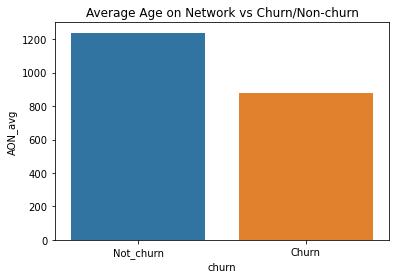

In [332]:
dat=churn_filtered.groupby('churn')['aon'].agg(['mean']).reset_index()
dat.columns=['churn','AON_avg']
pt=sns.barplot(x='churn',y='AON_avg',data=dat)
pt.set_xticklabels(['Not_churn','Churn'])
plt.title('Average Age on Network vs Churn/Non-churn')
dat
#Avergage Age on network
#Non churn :1237
#Churn: 875

No handles with labels found to put in legend.


       Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_arpu_6  527.878735  700.872578                57.04
2  mean_arpu_7  550.989781  616.038068                52.79
3  mean_arpu_8  561.650365  340.153081                37.72


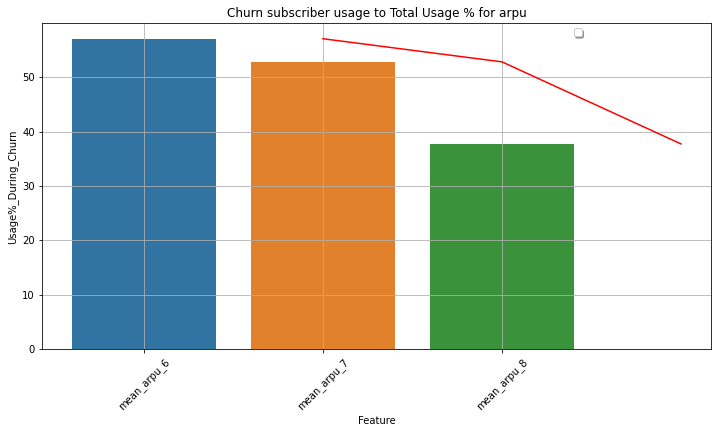

              Feature  Not-Churn      Churn  Usage%_During_Churn
1  mean_roam_ic_mou_6  14.513651  29.774781                67.23
2  mean_roam_ic_mou_7  10.948797  32.346531                74.71
3  mean_roam_ic_mou_8  11.291285  32.111432                73.98


No handles with labels found to put in legend.


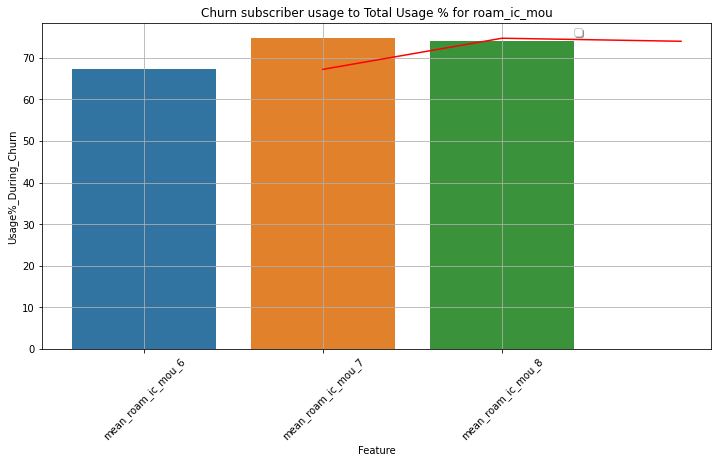

              Feature  Not-Churn      Churn  Usage%_During_Churn
1  mean_roam_og_mou_6  24.429375  57.285426                70.10
2  mean_roam_og_mou_7  17.272593  56.910302                76.72
3  mean_roam_og_mou_8  17.865520  56.765521                76.06


No handles with labels found to put in legend.


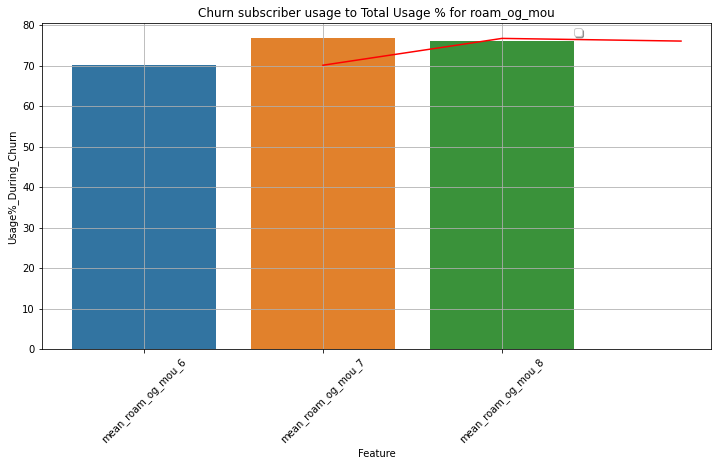

No handles with labels found to put in legend.


                 Feature  Not-Churn      Churn  Usage%_During_Churn
1  mean_loc_og_t2t_mou_6  83.570848  57.282291                40.67
2  mean_loc_og_t2t_mou_7  87.393534  48.848703                35.85
3  mean_loc_og_t2t_mou_8  85.540302  21.552562                20.13


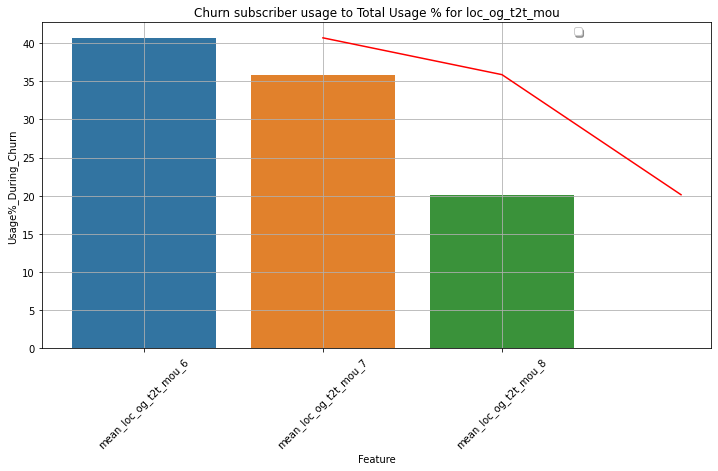

                 Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_loc_og_t2m_mou_6  161.385334  107.889817                40.07
2  mean_loc_og_t2m_mou_7  164.241004   93.782856                36.35
3  mean_loc_og_t2m_mou_8  164.111623   41.350915                20.13


No handles with labels found to put in legend.


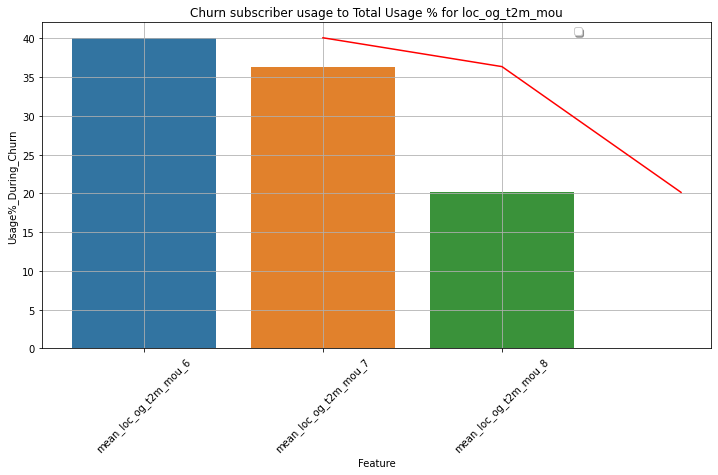

No handles with labels found to put in legend.


                 Feature  Not-Churn     Churn  Usage%_During_Churn
1  mean_loc_og_t2f_mou_6   6.354498  3.813795                37.51
2  mean_loc_og_t2f_mou_7   6.572383  3.491082                34.69
3  mean_loc_og_t2f_mou_8   6.348802  2.202562                25.76


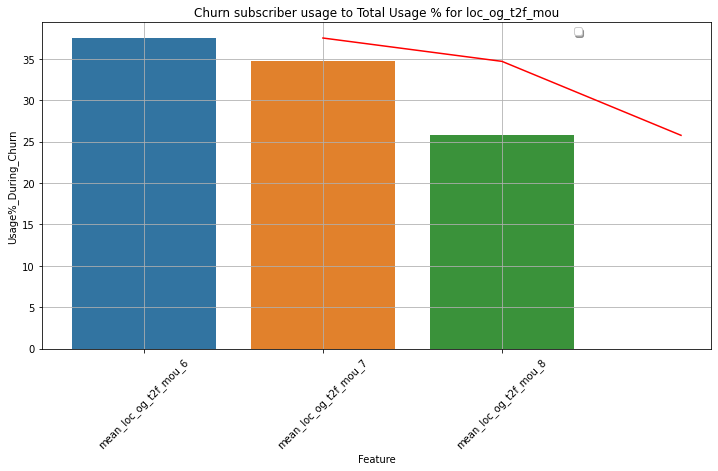

                 Feature  Not-Churn     Churn  Usage%_During_Churn
1  mean_loc_og_t2c_mou_6   1.528357  1.694185                52.57
2  mean_loc_og_t2c_mou_7   1.820088  2.409181                56.96
3  mean_loc_og_t2c_mou_8   1.894295  1.203405                38.85


No handles with labels found to put in legend.


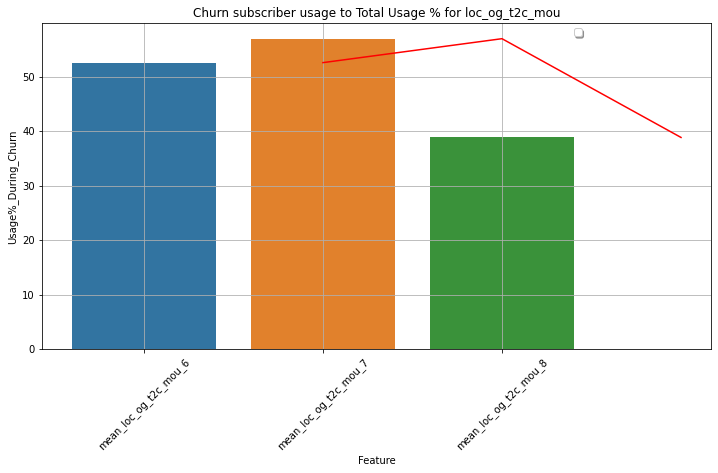

             Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_loc_og_mou_6  251.318907  168.992395                40.21
2  mean_loc_og_mou_7  258.215370  146.128982                36.14
3  mean_loc_og_mou_8  256.009187   65.109737                20.28


No handles with labels found to put in legend.


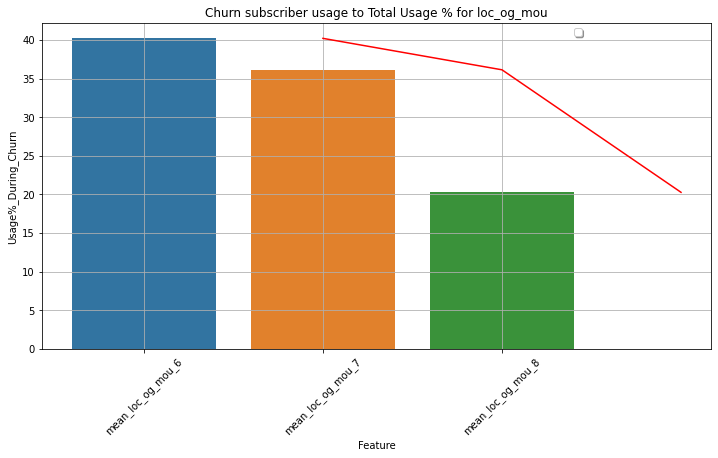

No handles with labels found to put in legend.


                 Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_std_og_t2t_mou_6  146.475979  315.082148                68.26
2  mean_std_og_t2t_mou_7  166.367845  282.441138                62.93
3  mean_std_og_t2t_mou_8  166.378211  123.417399                42.59


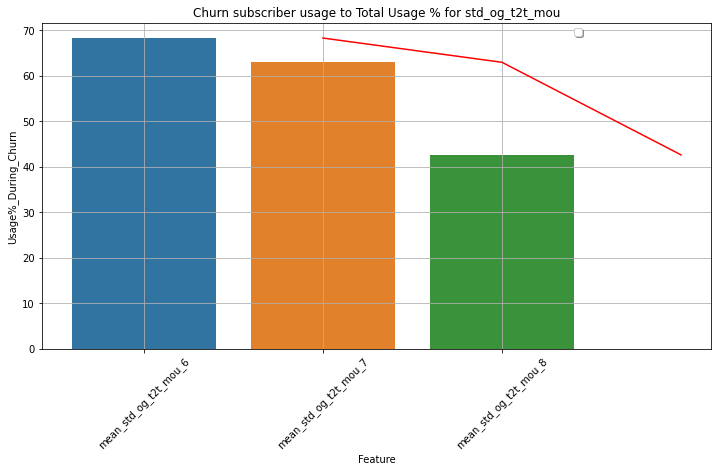

                 Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_std_og_t2m_mou_6  160.458327  315.933047                66.32
2  mean_std_og_t2m_mou_7  181.710444  286.713811                61.21
3  mean_std_og_t2m_mou_8  179.926546  107.436778                37.39


No handles with labels found to put in legend.


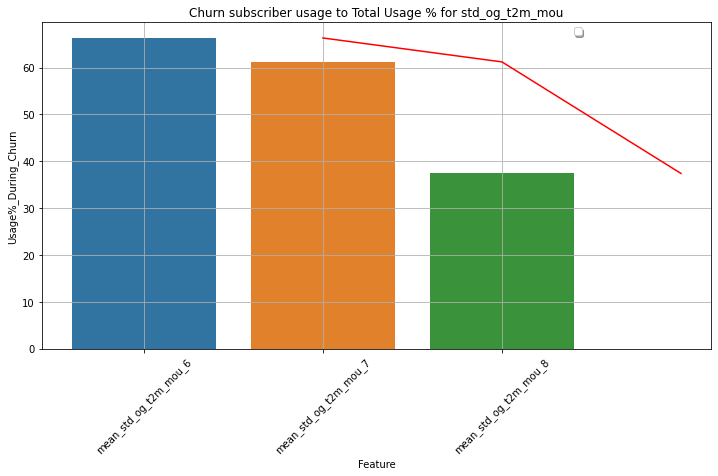

No handles with labels found to put in legend.


                 Feature  Not-Churn     Churn  Usage%_During_Churn
1  mean_std_og_t2f_mou_6   1.729443  0.942745                35.28
2  mean_std_og_t2f_mou_7   1.729846  1.117733                39.25
3  mean_std_og_t2f_mou_8   1.711952  0.423397                19.83


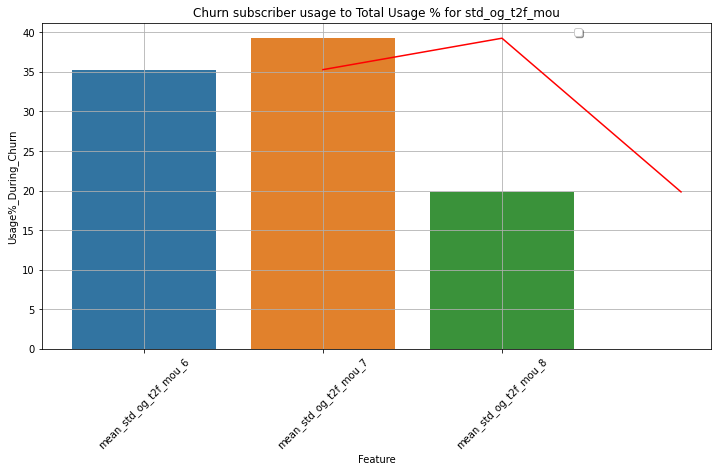

No handles with labels found to put in legend.


             Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_std_og_mou_6  308.667354  631.962053                67.19
2  mean_std_og_mou_7  349.811808  570.276778                61.98
3  mean_std_og_mou_8  348.020260  231.279714                39.92


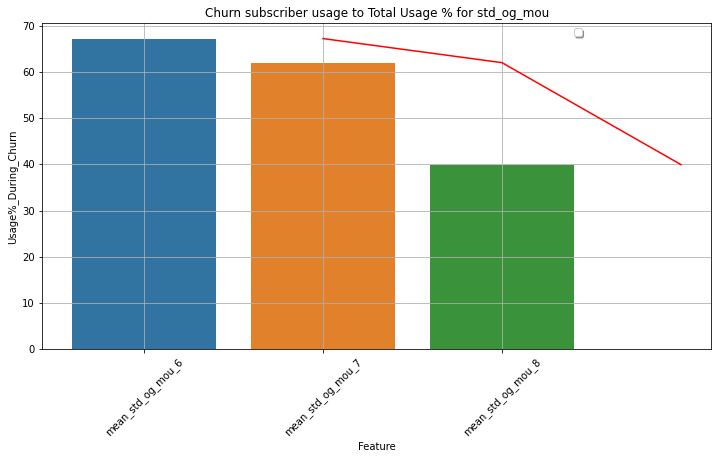

No handles with labels found to put in legend.


             Feature  Not-Churn     Churn  Usage%_During_Churn
1  mean_isd_og_mou_6   2.074086  5.603660                72.99
2  mean_isd_og_mou_7   2.136395  3.990239                65.13
3  mean_isd_og_mou_8   2.294143  2.560859                52.75


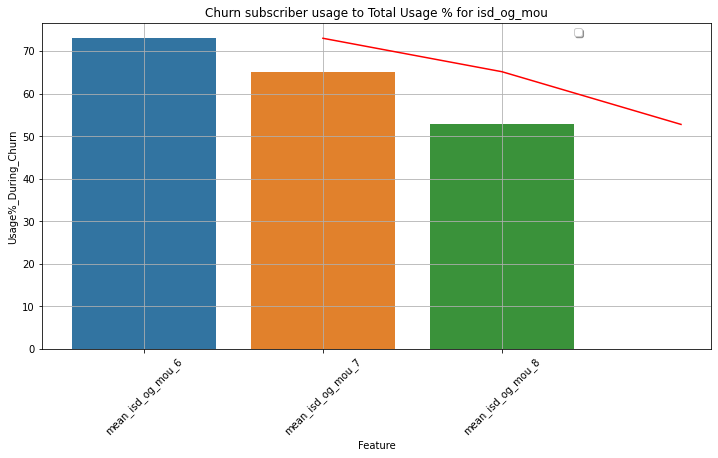

             Feature  Not-Churn     Churn  Usage%_During_Churn
1  mean_spl_og_mou_6   5.504404  7.139905                56.47
2  mean_spl_og_mou_7   7.020801  8.274471                54.10
3  mean_spl_og_mou_8   7.440264  3.583429                32.51


No handles with labels found to put in legend.


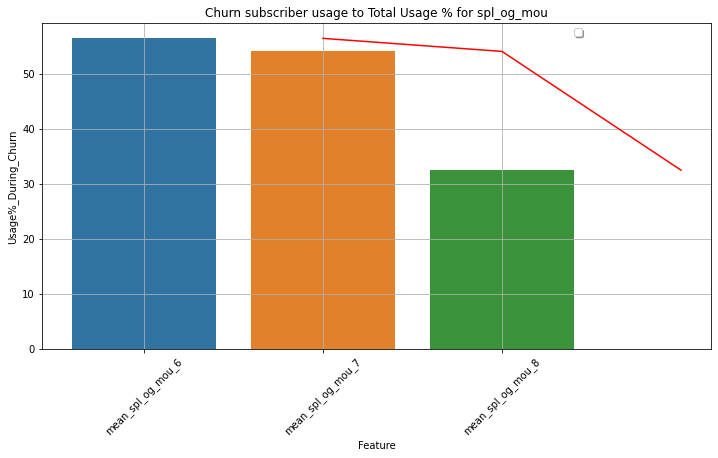

            Feature  Not-Churn     Churn  Usage%_During_Churn
1  mean_og_others_6   0.633752  0.748656                54.16
2  mean_og_others_7   0.033990  0.006523                16.10
3  mean_og_others_8   0.070818  0.000851                 1.19


No handles with labels found to put in legend.


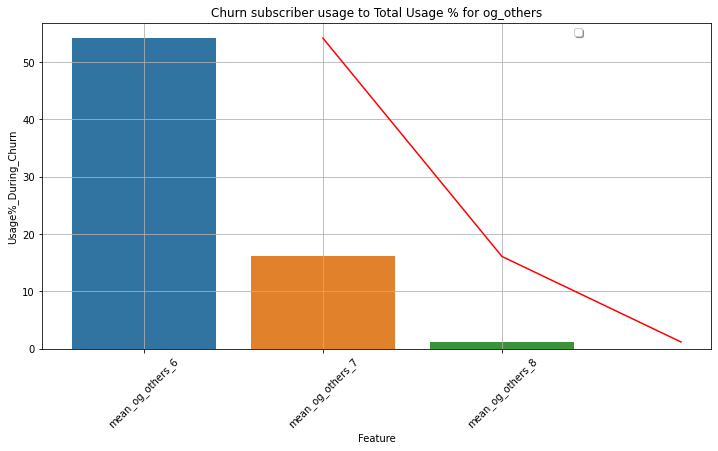

               Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_total_og_mou_6  568.207175  814.456277                58.90
2  mean_total_og_mou_7  617.226288  728.684614                54.14
3  mean_total_og_mou_8  613.842751  302.539562                33.01


No handles with labels found to put in legend.


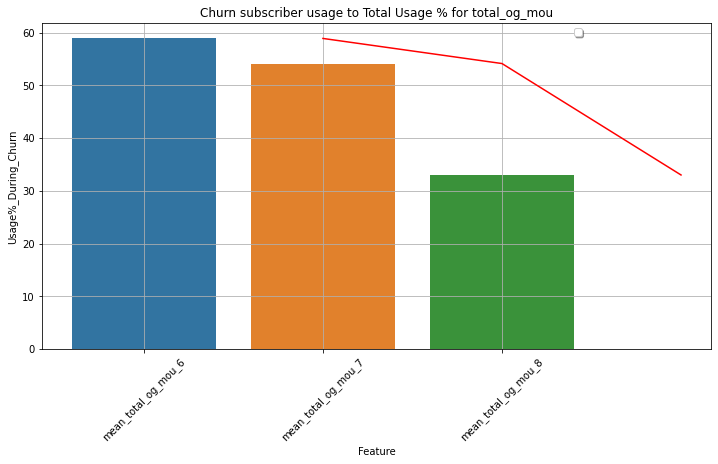

No handles with labels found to put in legend.


                 Feature  Not-Churn      Churn  Usage%_During_Churn
1  mean_loc_ic_t2t_mou_6  64.631718  42.269491                39.54
2  mean_loc_ic_t2t_mou_7  66.893337  35.630955                34.75
3  mean_loc_ic_t2t_mou_8  67.381545  15.719737                18.92


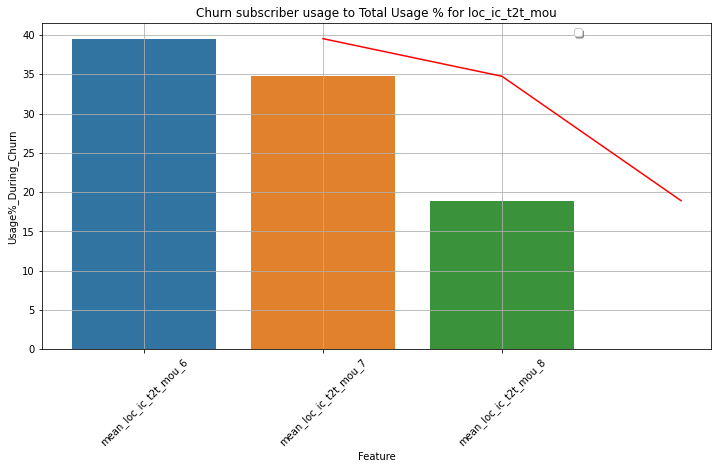

No handles with labels found to put in legend.


                 Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_loc_ic_t2m_mou_6  149.118490  102.507208                40.74
2  mean_loc_ic_t2m_mou_7  153.340450   84.327430                35.48
3  mean_loc_ic_t2m_mou_8  156.882888   38.921750                19.88


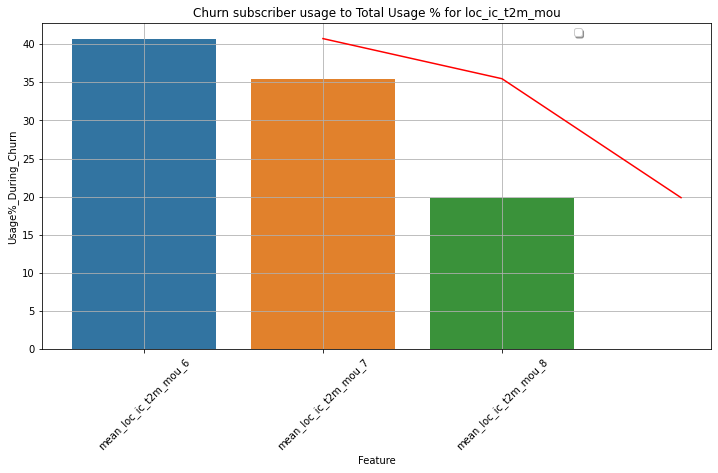

No handles with labels found to put in legend.


                 Feature  Not-Churn     Churn  Usage%_During_Churn
1  mean_loc_ic_t2f_mou_6  15.758439  7.904495                33.40
2  mean_loc_ic_t2f_mou_7  16.819237  7.410111                30.58
3  mean_loc_ic_t2f_mou_8  15.683328  3.359157                17.64


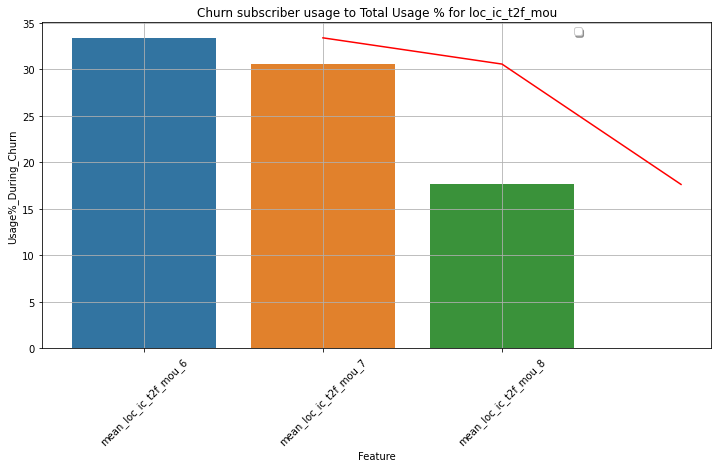

No handles with labels found to put in legend.


             Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_loc_ic_mou_6  229.518305  152.688751                39.95
2  mean_loc_ic_mou_7  237.062924  127.375449                34.95
3  mean_loc_ic_mou_8  239.957731   58.005131                19.47


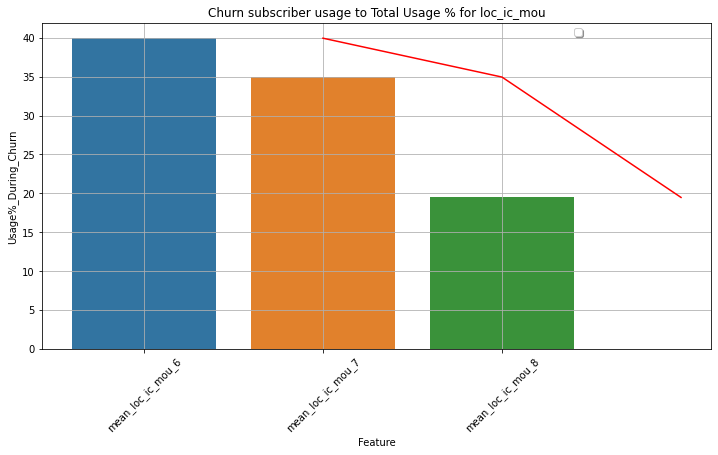

No handles with labels found to put in legend.


                 Feature  Not-Churn      Churn  Usage%_During_Churn
1  mean_std_ic_t2t_mou_6  13.557604  21.226388                61.02
2  mean_std_ic_t2t_mou_7  14.920817  17.774765                54.36
3  mean_std_ic_t2t_mou_8  15.167615   5.834224                27.78


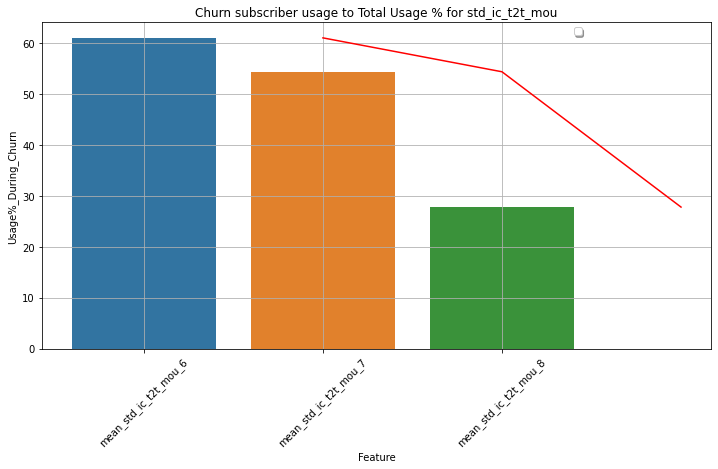

No handles with labels found to put in legend.


                 Feature  Not-Churn      Churn  Usage%_During_Churn
1  mean_std_ic_t2m_mou_6  27.796352  31.570605                53.18
2  mean_std_ic_t2m_mou_7  30.245200  28.274598                48.32
3  mean_std_ic_t2m_mou_8  30.137036  12.188568                28.80


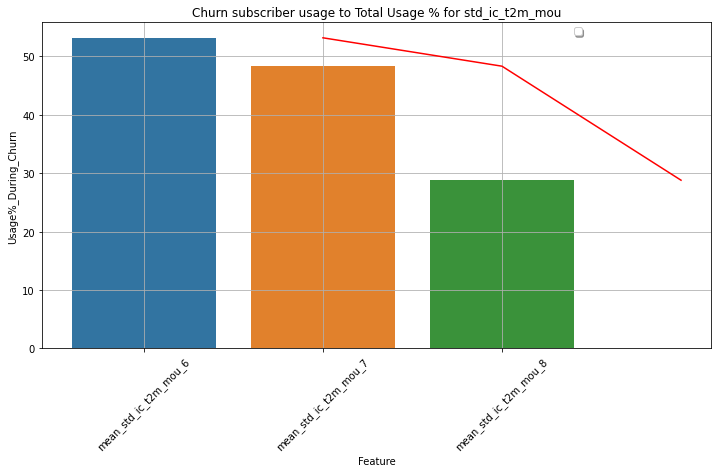

                 Feature  Not-Churn     Churn  Usage%_During_Churn
1  mean_std_ic_t2f_mou_6   2.701663  1.399777                34.13
2  mean_std_ic_t2f_mou_7   2.813931  1.505068                34.85
3  mean_std_ic_t2f_mou_8   2.614039  0.671567                20.44


No handles with labels found to put in legend.


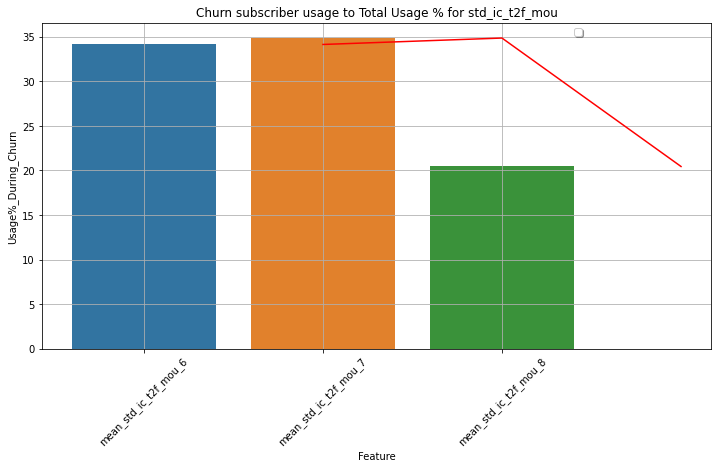

No handles with labels found to put in legend.


             Feature  Not-Churn      Churn  Usage%_During_Churn
1  mean_std_ic_mou_6  44.059047  54.200509                55.16
2  mean_std_ic_mou_7  47.983569  47.557987                49.78
3  mean_std_ic_mou_8  47.922321  18.696126                28.06


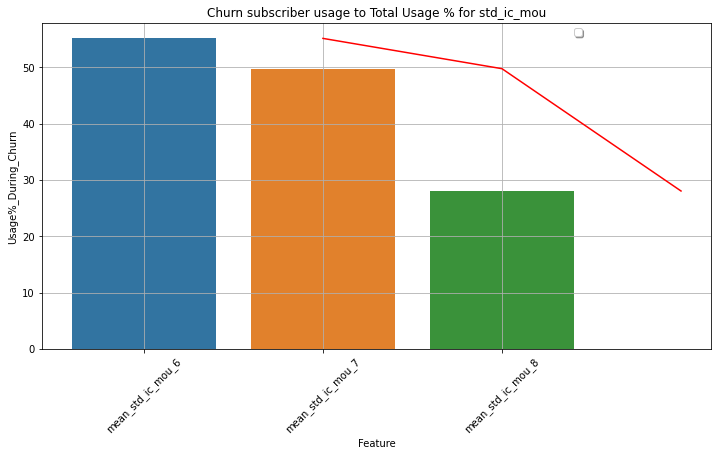

No handles with labels found to put in legend.


               Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_total_ic_mou_6  285.359836  218.953262                43.42
2  mean_total_ic_mou_7  298.344607  186.360780                38.45
3  mean_total_ic_mou_8  301.151779   84.850621                21.98


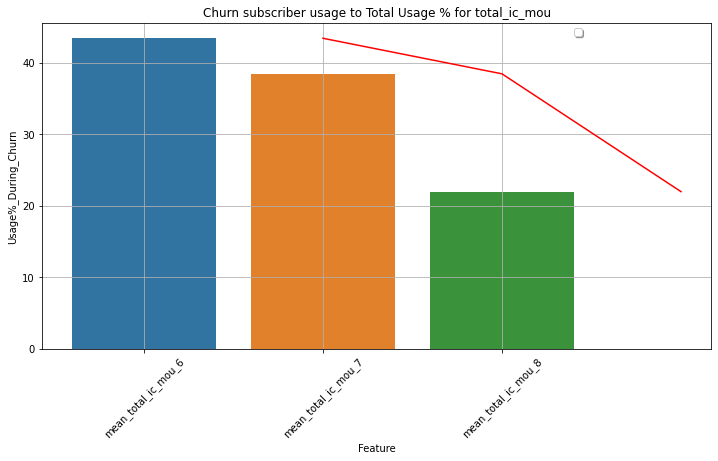

             Feature  Not-Churn     Churn  Usage%_During_Churn
1  mean_spl_ic_mou_6   0.060221  0.057279                48.75
2  mean_spl_ic_mou_7   0.019615  0.014224                42.04
3  mean_spl_ic_mou_8   0.031202  0.003771                10.78


No handles with labels found to put in legend.


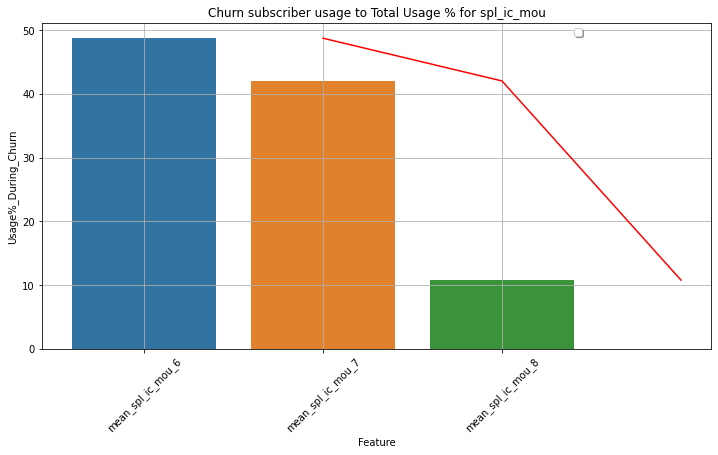

No handles with labels found to put in legend.


             Feature  Not-Churn      Churn  Usage%_During_Churn
1  mean_isd_ic_mou_6  10.502820  11.193747                51.59
2  mean_isd_ic_mou_7  11.669674  10.612132                47.63
3  mean_isd_ic_mou_8  11.875170   7.602737                39.03


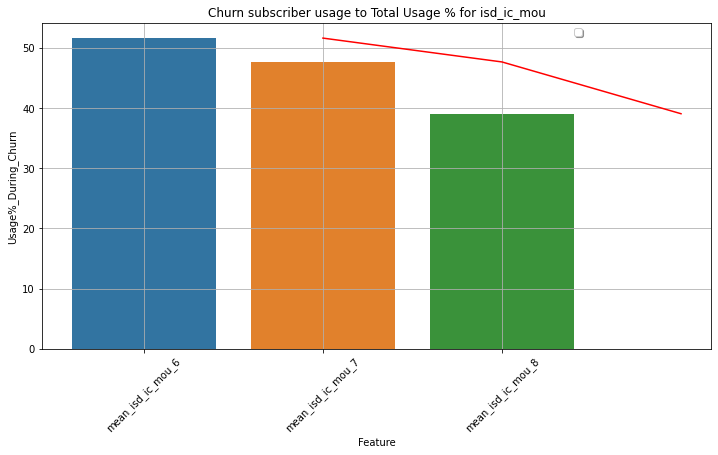

            Feature  Not-Churn     Churn  Usage%_During_Churn
1  mean_ic_others_6   1.211473  0.805259                39.93
2  mean_ic_others_7   1.601223  0.794487                33.16
3  mean_ic_others_8   1.357565  0.538759                28.41


No handles with labels found to put in legend.


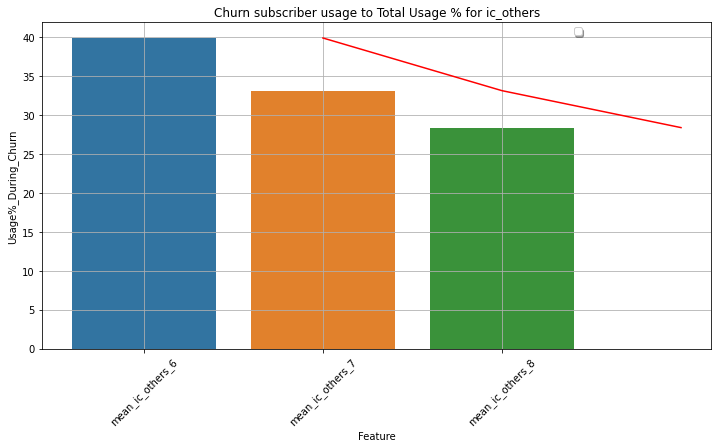

No handles with labels found to put in legend.


                 Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_total_rech_amt_6  622.258458  830.226730                57.16
2  mean_total_rech_amt_7  646.585241  719.031026                52.65
3  mean_total_rech_amt_8  657.860363  373.770883                36.23


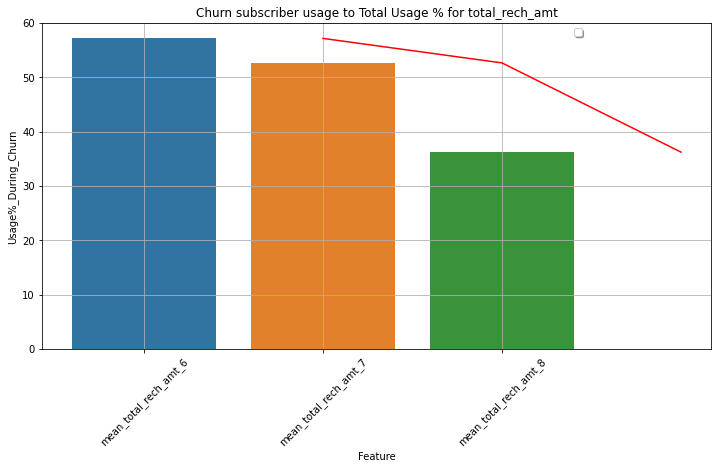

No handles with labels found to put in legend.


                  Feature  Not-Churn     Churn  Usage%_During_Churn
1  mean_total_rech_data_6   1.618011  1.791567                52.55
2  mean_total_rech_data_7   1.871455  1.585521                45.86
3  mean_total_rech_data_8   1.960596  0.641209                24.64


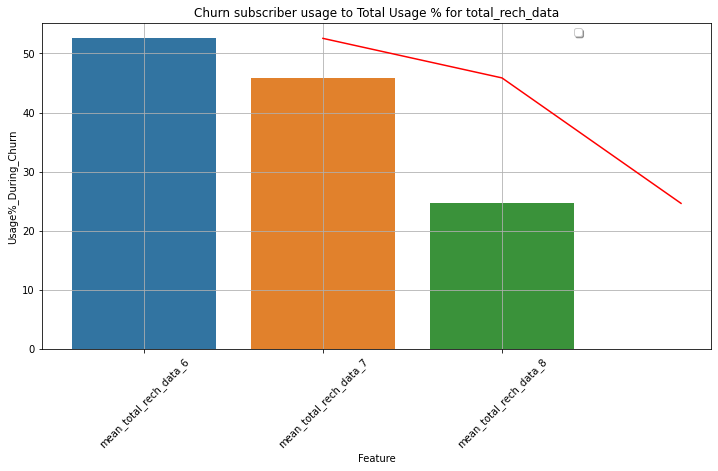

No handles with labels found to put in legend.


                Feature  Not-Churn      Churn  Usage%_During_Churn
1  mean_max_rech_data_6  76.832303  72.784407                48.65
2  mean_max_rech_data_7  80.504508  65.249801                44.77
3  mean_max_rech_data_8  83.529933  38.601432                31.61


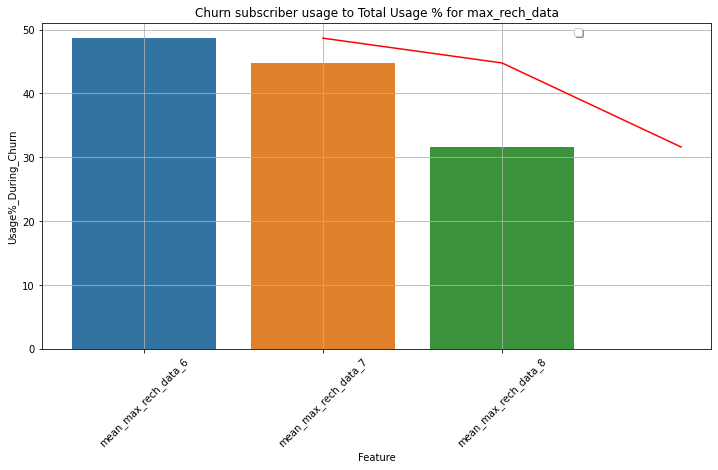

                   Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_av_rech_amt_data_6  128.023233  127.968974                49.99
2  mean_av_rech_amt_data_7  141.029459  112.226523                44.31
3  mean_av_rech_amt_data_8  144.715802   55.027311                27.55

No handles with labels found to put in legend.


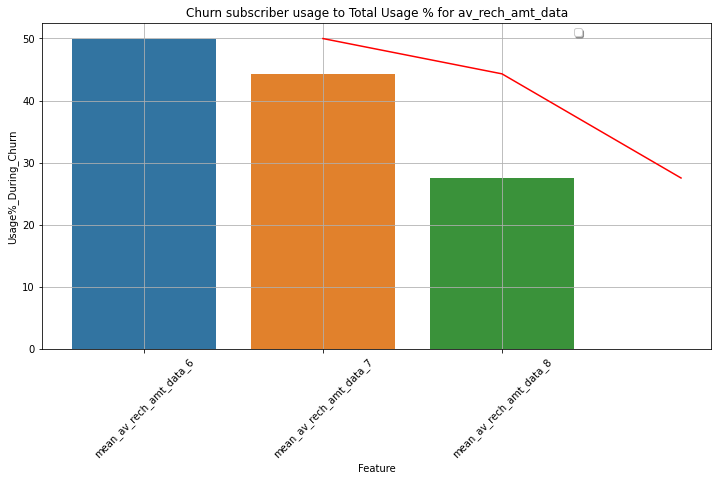

No handles with labels found to put in legend.


            Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_vol_2g_mb_6  124.779279  109.529435                46.75
2  mean_vol_2g_mb_7  127.845609   97.998305                43.39
3  mean_vol_2g_mb_8  127.521324   36.915036                22.45


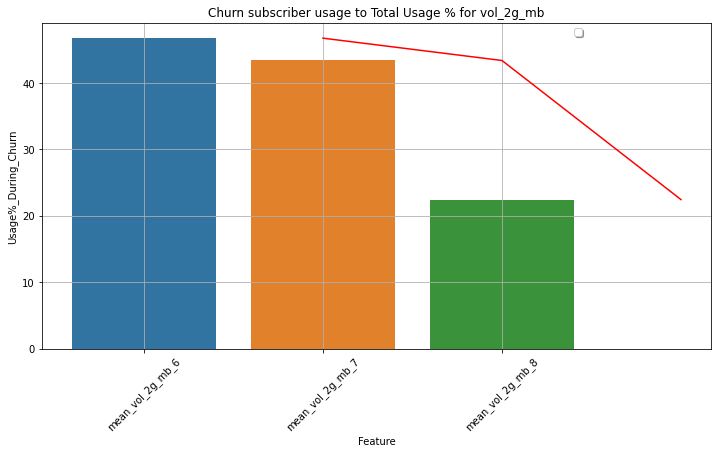

            Feature   Not-Churn       Churn  Usage%_During_Churn
1  mean_vol_3g_mb_6  343.450155  363.743994                51.43
2  mean_vol_3g_mb_7  378.982308  294.082100                43.69
3  mean_vol_3g_mb_8  403.194902  152.064081                27.39


No handles with labels found to put in legend.


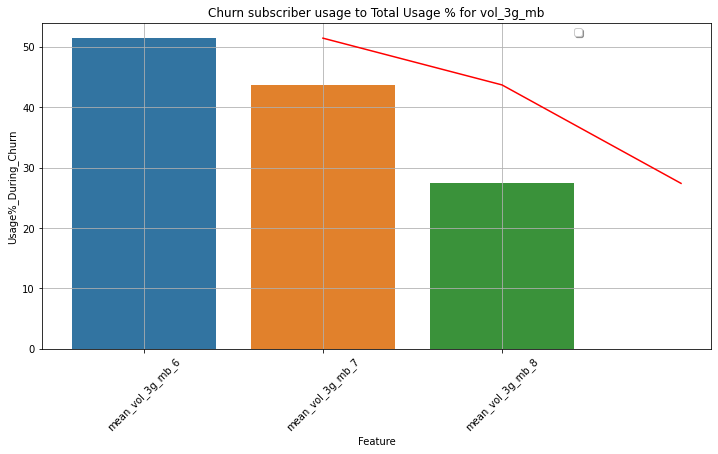

In [333]:
EDA()

### EDA Inferences:
1. ARPU, Local Outgoing (t2t,t2m,t2f,t2c) Monthly Usage is less in 8th month than 6th and 7th month.

2. Roam_IC_MOU,Roam_OG_MOU,Outgoing Others is not having any changes in good and decision period.

3. STD outgoing (t2t,t2m,t2f) Monthly Usage is less in 8th month than 6th and 7th month.

4. (STD,ISD,special) outgoing Monthly Usage is less in 8th month than 6th and 7th month.

5. Local Incoming (t2t,t2m) Monthly Usage is less in 8th month than 6th and 7th month.

6. STD incoming (t2t,t2m,t2f,Total) Monthly Usage is less in 8th month than 6th and 7th month.

7. Total Incoming/Outgoing Usage is less in 8th month than 6th and 7th month.



In [334]:
churn_filtered.head(2)

id   arpu_6   arpu_7   arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0   4  240.708  128.191  101.565          53.64            0.0            0.0   
1  15  580.549  377.294  338.286           0.00            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0          15.73            0.0            0.0             10.16   
1           0.00            0.0            0.0             10.43   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              4.83              6.13             36.74             19.88   
1             24.99            194.43            313.76            330.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              4.61             11.99              1.23              5.01   
1            185.88              3.26             10.91              4.94   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              9.85               0.0         58.91   
1               0.0              0.00               0.0        327.46   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         25.94         15.76               0.0               0.0   
1        366.79        385.26               0.0               0.0   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.0              4.35               0.0               0.0   
1               0.0              0.00               0.0               0.0   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0               0.0               0.0              0.00          4.35   
1               0.0               0.0              6.26          0.00   

   std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
0           0.0          0.00           0.0           0.0           0.0   
1           0.0          6.26           0.0           0.0           0.0   

   spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
0          0.00          17.0           0.0          0.0          0.0   
1          0.08           0.0           0.0          0.1          0.0   

   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0          0.0           63.26           42.94           15.76   
1          0.0          327.64          366.79          391.53   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0              5.44              1.39              2.66             10.58   
1             13.86             20.18            335.43            219.31   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0              4.33             19.49              5.51              3.63   
1            754.24            285.63              0.00              1.93   

   loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0              6.14         21.54          9.36         28.31   
1              8.88        233.18        776.36        629.94   

   std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
0               0.0               0.0               0.0              0.00   
1               0.0               0.0               0.0              1.03   

   std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0               0.0           0.0          0.00           0.0           21.54   
1               0.0           0.0          1.03           0.0          233.18   

   total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
0            9.36           28.31           0.0           0.0           0.0   
1          777.39          629.94      

In [335]:
print(churn_filtered.shape)
print(df_test.shape)

(21001, 108)
(30000, 107)


## Outlier treatment


In [336]:
def cap_data(df):
    for col in df.columns:
        #print("capping the ",col)
        if(df[col].dtype==np.number):
        #if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

churn_filtered=cap_data(churn_filtered)

In [337]:
print(churn_filtered.shape)
print(df_test.shape)

(21001, 108)
(30000, 107)


In [338]:
churn_filtered.shape

(21001, 108)

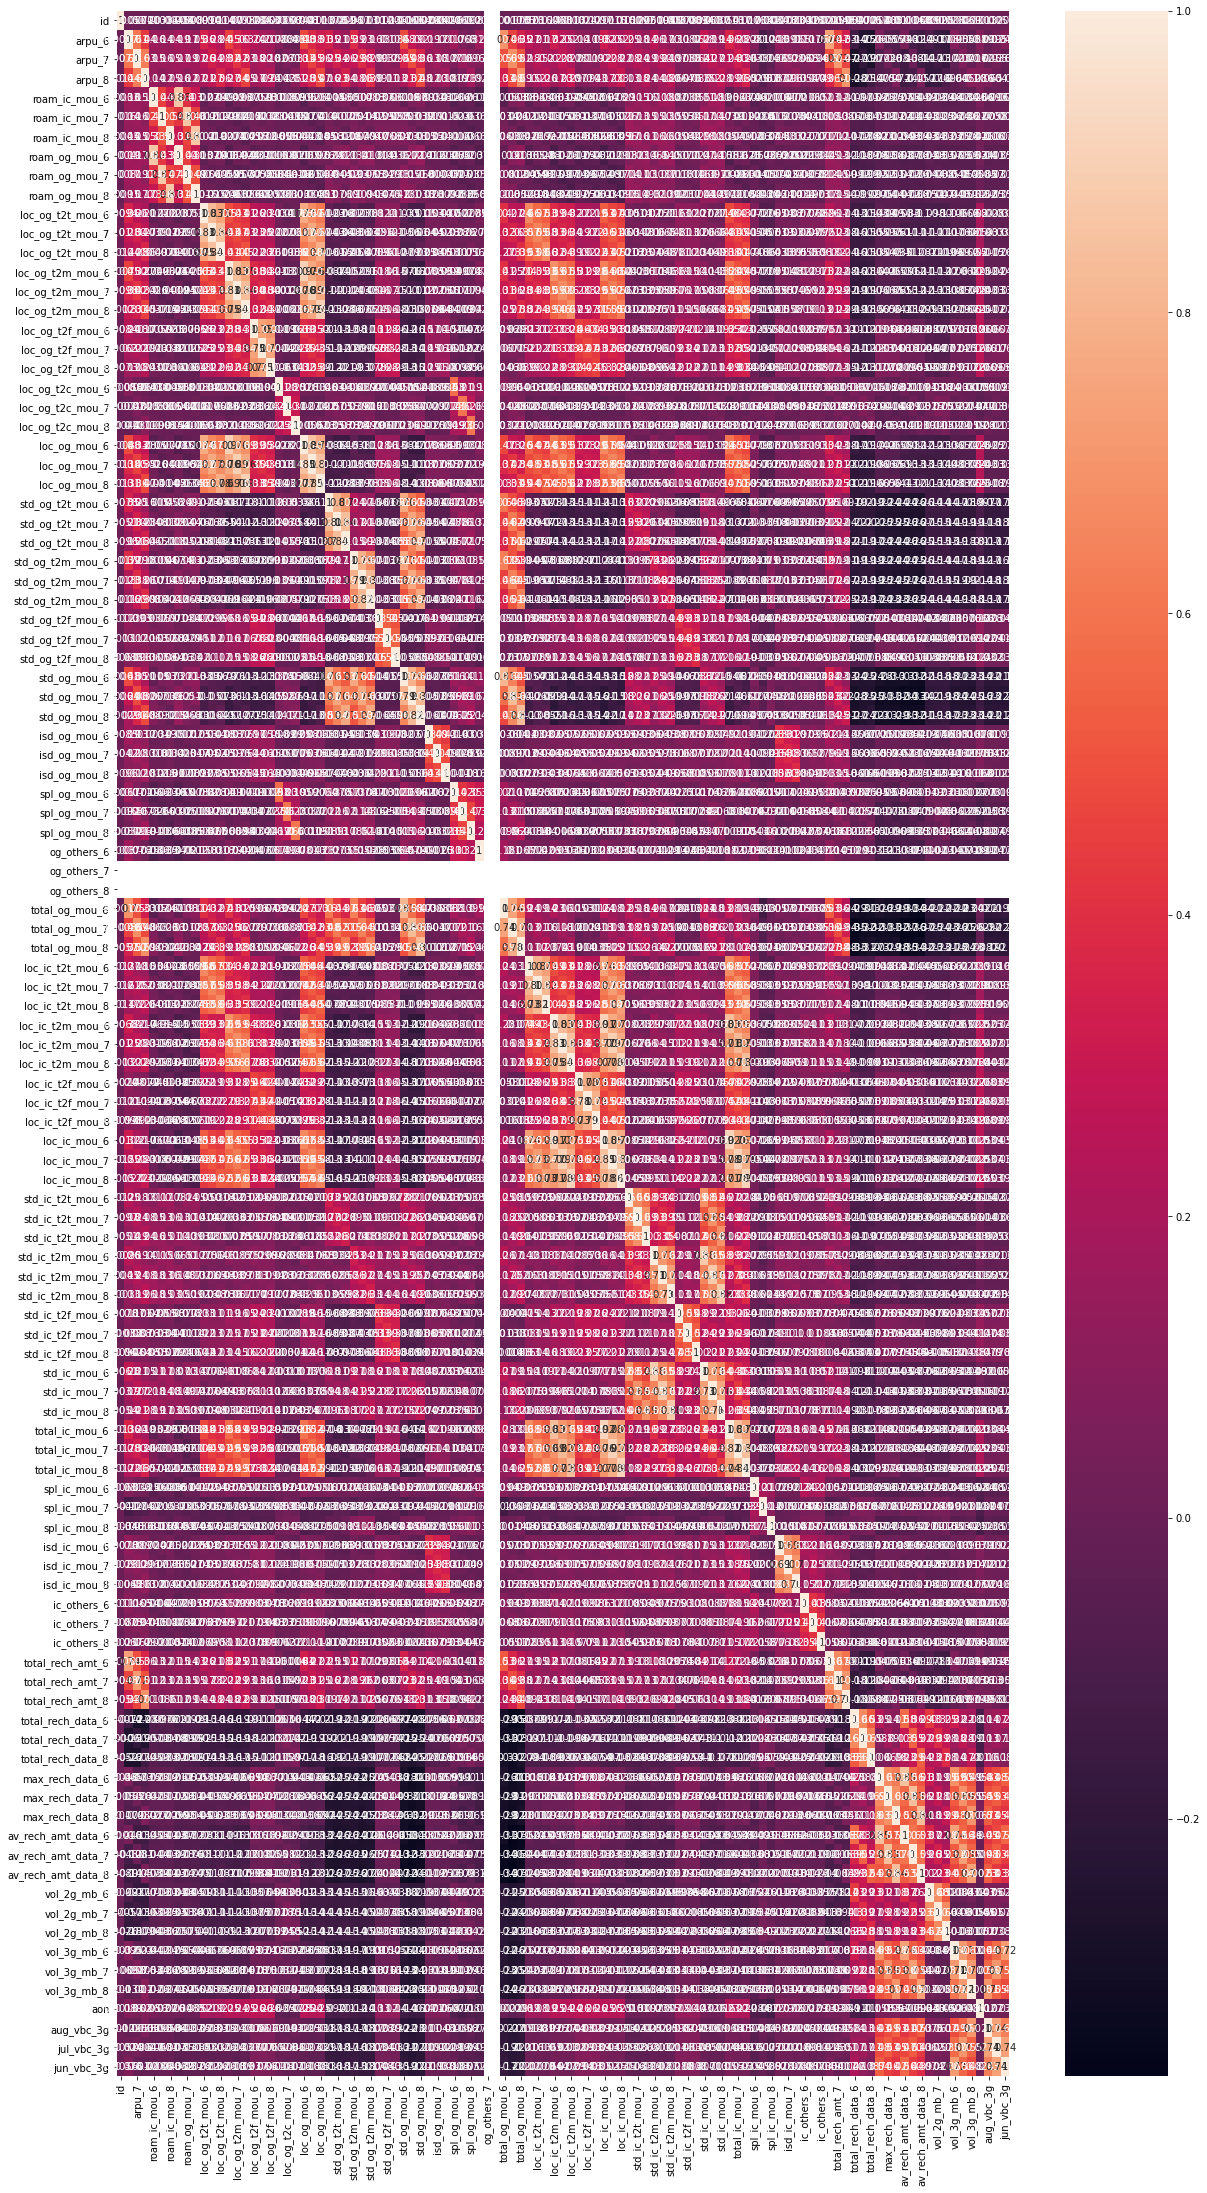

In [339]:
%matplotlib inline
plt.figure(figsize=(20,38))
sns.heatmap(churn_filtered.corr(),annot=True)
plt.show()
##Visualisation is pretty hard with so many features

##  3. Modelling and evaluation

In [340]:
# change churn to numeric
churn_filtered['churn'] = pd.to_numeric(churn_filtered['churn'])

### Train test split

In [341]:

# divide data into train and test
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4, stratify = y)

In [342]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14700, 107)
(14700,)
(6301, 107)
(6301,)


### PCA and logistic regression

In [394]:
scaler = StandardScaler()

In [395]:
## Scaling only features which are numeric
columns_to_transform = X_train.columns.tolist()

X_train[columns_to_transform] = scaler.fit_transform(X_train[columns_to_transform]) 
X_test[columns_to_transform] = scaler.fit_transform(X_test[columns_to_transform]) 

In [396]:
pca = PCA(svd_solver='randomized', random_state = 100)
pca.fit(X_train)
# Components from the PCA
pca.components_

array([[ 2.83387147e-01,  2.83489320e-01,  9.68604834e-03,
         1.58992407e-01,  2.64456128e-01,  2.23786815e-01,
         1.85668097e-01,  1.53076565e-02,  2.09548616e-01,
         2.54630408e-01,  2.71003612e-01, -5.54463253e-02,
         2.19107947e-01,  1.50668934e-01, -6.86179369e-02,
         2.03531327e-01,  9.28908740e-02,  1.62959203e-01,
        -9.31802311e-02,  1.16474725e-01,  1.78529611e-01,
         2.72804371e-01,  1.71598409e-01,  1.09034664e-01,
        -2.56094419e-02,  4.02421740e-02,  2.71104436e-01,
         6.57565778e-03,  1.49248938e-01,  2.32307740e-01],
       [-2.14926472e-01, -1.67706378e-01,  1.37637359e-01,
         1.97138161e-01, -1.96704827e-01, -1.36381298e-01,
         2.66245211e-01,  1.05867569e-01,  1.86086659e-01,
        -7.65228896e-02, -7.02401946e-02, -1.84871159e-01,
        -4.72117769e-02, -1.58621760e-01, -1.18575958e-01,
         2.57255303e-01, -1.00616499e-01,  2.45505448e-01,
        -1.54226000e-01,  7.76164894e-02,  1.94395984e-

In [397]:
pca.explained_variance_ratio_

array([0.28487329, 0.15121865, 0.08022757, 0.06651981, 0.06067591,
       0.04514702, 0.03656412, 0.03336103, 0.03261886, 0.02850426,
       0.02725969, 0.02647463, 0.02203501, 0.02140192, 0.01604135,
       0.01253525, 0.01059168, 0.00840583, 0.00733818, 0.00454845,
       0.00430147, 0.00407342, 0.00338488, 0.00284314, 0.00249291,
       0.0024277 , 0.00171881, 0.00119643, 0.00076612, 0.00045261])

In [398]:
## Verifying PC and variables
column_names = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':column_names})
pcs_df.head(30)

PC1       PC2             Feature
0   0.283387 -0.214926        loc_ic_mou_8
1   0.283489 -0.167706      total_ic_mou_8
2   0.009686  0.137637       roam_og_mou_8
3   0.158992  0.197138    total_rech_amt_8
4   0.264456 -0.196705    loc_ic_t2m_mou_8
5   0.223787 -0.136381    loc_ic_t2t_mou_8
6   0.185668  0.266245      total_og_mou_8
7   0.015308  0.105868       roam_ic_mou_8
8   0.209549  0.186087              arpu_8
9   0.254630 -0.076523    loc_og_t2m_mou_8
10  0.271004 -0.070240        loc_og_mou_8
11 -0.055446 -0.184871  av_rech_amt_data_8
12  0.219108 -0.047212    loc_og_t2t_mou_8
13  0.150669 -0.158622    loc_ic_t2f_mou_8
14 -0.068618 -0.118576         vol_2g_mb_8
15  0.203531  0.257255              arpu_7
16  0.092891 -0.100616                 aon
17  0.162959  0.245505    total_rech_amt_7
18 -0.093180 -0.154226   total_rech_data_8
19  0.116475  0.077616        std_ic_mou_8
20  0.178530  0.194396              arpu_6
21  0.272804 -0.191274        loc_ic_mou_7
22  0.171598  0.316010      total_og_mou_7
23  0.109035  0.077660    std_ic_t2m_mou_8
24 -0.025609 -0.171071     max_rech_data_8
25  0.040242  0.365310        std_og_mou_7
26  0.271104 -0.143019      total_ic_mou_7
27  0.006576 -0.010683                  id
28  0.149249  0.214416    total_rech_amt_6
29  0.232308 -0.177557    loc_ic_t2m_mou_6

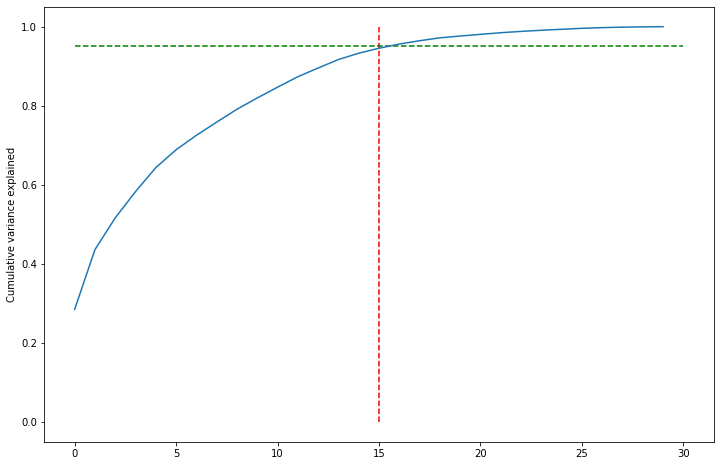

In [399]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative variance explained")
plt.show()

In [432]:
##Observations:
##From the scree plot we acn see that approximately 25-30 variables can explain 95% of data variance
##With 15 variables we can explain 90% of variance.


In [433]:
pca_final = IncrementalPCA(n_components=15)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(14700, 15)

In [434]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(6301, 15)

In [435]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(15, 15)

<AxesSubplot:>

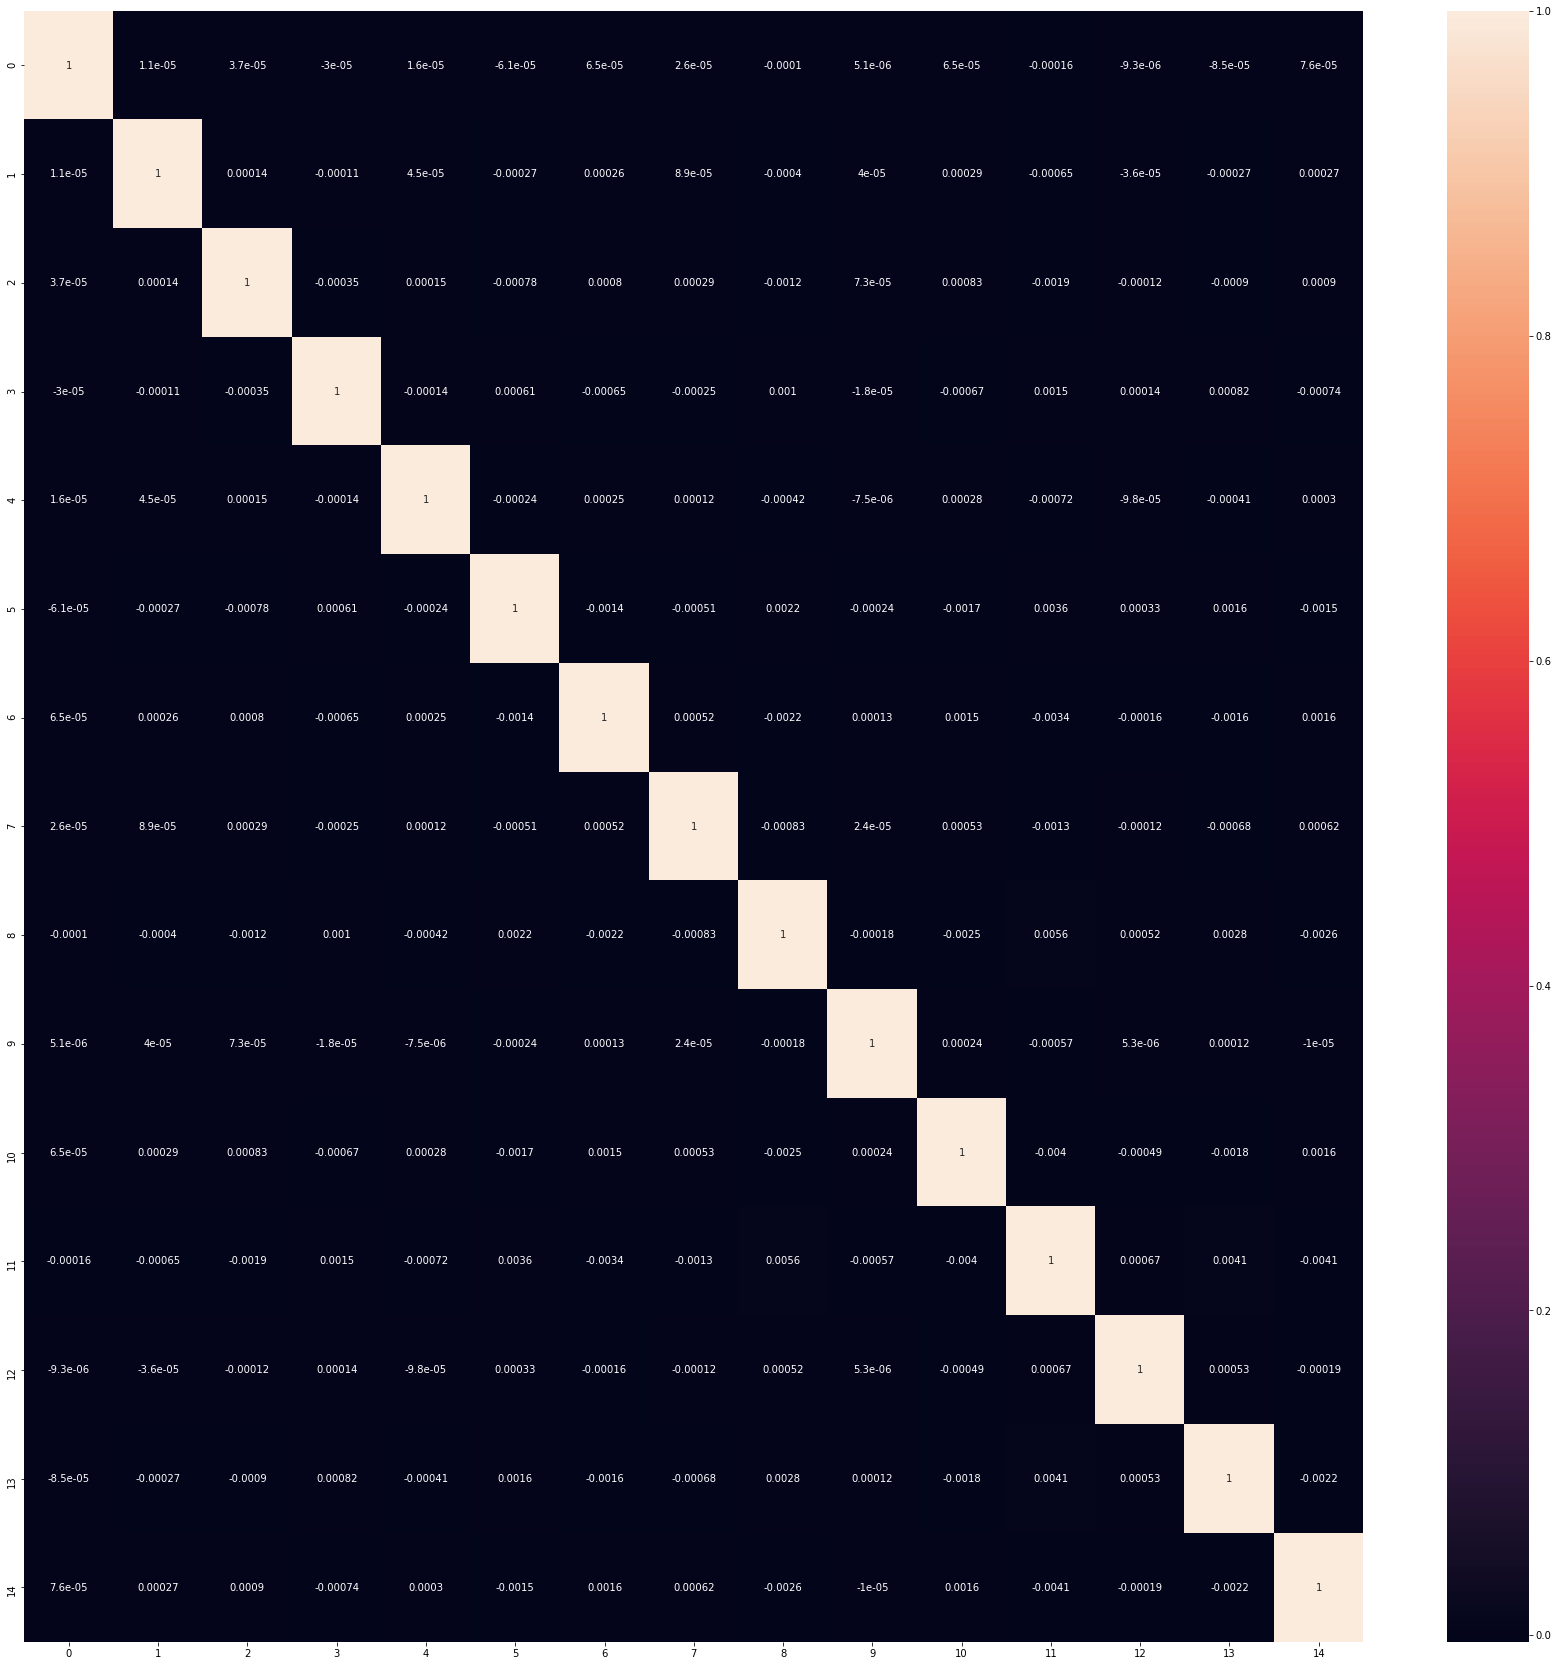

In [436]:
#plotting the correlation matrix
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)

In [437]:
##Handling imbalanced Dataset
###Customer chrun dataset is highly imbalanced, 
###where more than 90% of the records are for customers not churning

###Most of the machine learning algorithm comes with class_weights 
###that can be used to penalize the wrong prediction and for weighted imbalance class



In [438]:
y_train.value_counts()

0    13820
1      880
Name: churn, dtype: int64

In [439]:
# Define the class weights 
weights = {0:0.1, 1:0.9}

In [440]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 100, class_weight=weights)
model_pca = logreg.fit(X_train_pca, y_train)
round(model_pca.score(X_train_pca, y_train) * 100, 2)

88.03

[[12334  1486]
 [  273   607]]
Accuracy Score ==> 0.8803401360544217
AUC Score ==> 0.7911237008288383
ROC_AUC Score ==> 0.87
Not-Churn Accuracy Rate:(Specificity) ==> 0.8924746743849493
Churn Accuracy Rate:(Sensitivity) ==> 0.6897727272727273


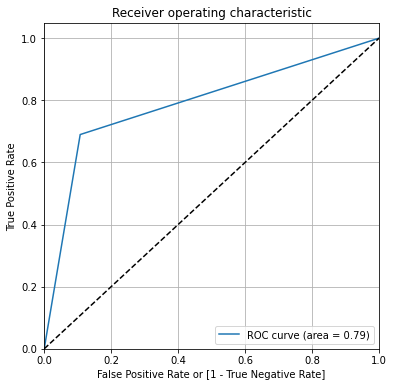

In [441]:
modelEvaluation(y_train,model_pca.predict(X_train_pca),model_pca,X_train_pca)

[[5244  680]
 [ 110  267]]
Accuracy Score ==> 0.8746230757022695
AUC Score ==> 0.7967177528983391
ROC_AUC Score ==> 0.86
Not-Churn Accuracy Rate:(Specificity) ==> 0.8852126941255908
Churn Accuracy Rate:(Sensitivity) ==> 0.7082228116710876


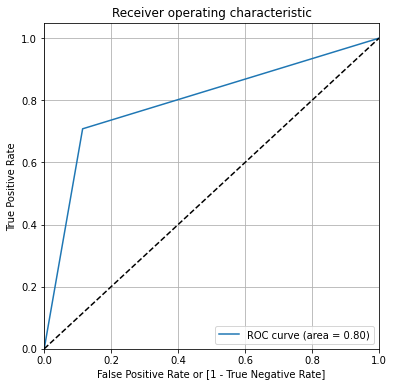

In [442]:
#on test data
modelEvaluation(y_test,model_pca.predict(X_test_pca),model_pca,X_test_pca)

In [443]:
#Sensistivity is too low

## Decision tree Classifier

In [444]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
dt_base = DecisionTreeClassifier(random_state = 100, max_depth = 5, class_weight=weights)
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       random_state=100)

In [445]:
y_train_pred = dt_base.predict(X_train)

[[12314  1506]
 [  157   723]]
Accuracy Score ==> 0.8868707482993198
AUC Score ==> 0.856309202736482
ROC_AUC Score ==> 0.92
Not-Churn Accuracy Rate:(Specificity) ==> 0.891027496382055
Churn Accuracy Rate:(Sensitivity) ==> 0.821590909090909


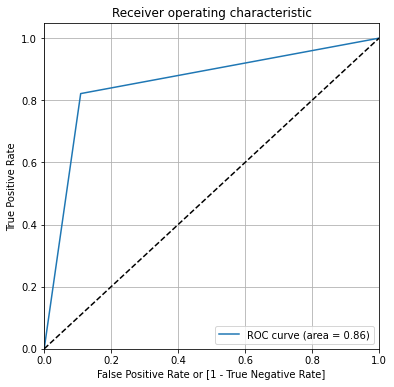

In [446]:
modelEvaluation(y_train,y_train_pred,dt_base,X_train)

[[3746 2178]
 [ 127  250]]
Accuracy Score ==> 0.6341850499920647
AUC Score ==> 0.6477364924767658
ROC_AUC Score ==> 0.61
Not-Churn Accuracy Rate:(Specificity) ==> 0.6323430114787306
Churn Accuracy Rate:(Sensitivity) ==> 0.6631299734748011


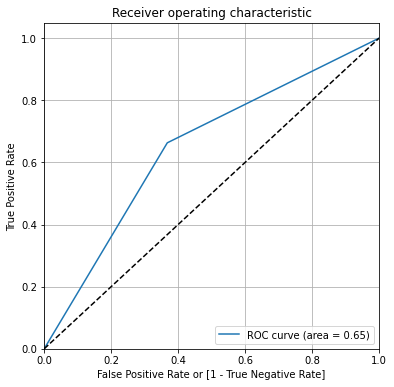

In [447]:
#predict on test set
modelEvaluation(y_test,dt_base.predict(X_test),dt_base,X_test)

In [448]:
#All the metrics are not good than logisic regression +PCA

In [449]:
#Performing hyper parameter tuning
dt = DecisionTreeClassifier(random_state = 100, class_weight=weights)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [10,20,50,100,500],
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

grid_search = GridSearchCV(estimator = dt,param_grid = params,cv = 5, n_jobs=-1, verbose=1, scoring="accuracy")

In [450]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Wall time: 52 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9},
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [10, 20, 50, 100, 500],
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy', verbose=1)

In [451]:
# Get the results in tabular format
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.334296      0.007654         0.006249        0.007653   
1       0.362414      0.053569         0.009373        0.007653   
2       0.334296      0.007653         0.003124        0.006249   
3       0.359290      0.055008         0.000000        0.000000   
4       0.334296      0.007653         0.000000        0.000000   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                     10   
1         entropy               5                     10   
2         entropy               5                     20   
3         entropy               5                     20   
4         entropy               5                     50   

  param_min_samples_split                                             params  \
0                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.908503           0.879932           0.889116           0.893197   
1           0.908503           0.879932           0.889116           0.893197   
2           0.908163           0.879252           0.890136           0.892857   
3           0.908163           0.879252           0.890136           0.892857   
4           0.908503           0.878231           0.894218           0.894558   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.873810         0.888912        0.011924               22  
1           0.874830         0.889116        0.011670               21  
2           0.876531         0.889388        0.011253               20  
3           0.878231         0.889728        0.010879               19  
4           0.876871         0.890476        0.011753               17

In [452]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=5, min_samples_leaf=500, min_samples_split=50,
                       random_state=100)

In [453]:
# fit the training dataset and predict y_test
dt_best.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=5, min_samples_leaf=500, min_samples_split=50,
                       random_state=100)

[[12837   983]
 [  286   594]]
Accuracy Score ==> 0.9136734693877551
AUC Score ==> 0.8019356005788711
ROC_AUC Score ==> 0.9
Not-Churn Accuracy Rate:(Specificity) ==> 0.9288712011577424
Churn Accuracy Rate:(Sensitivity) ==> 0.675


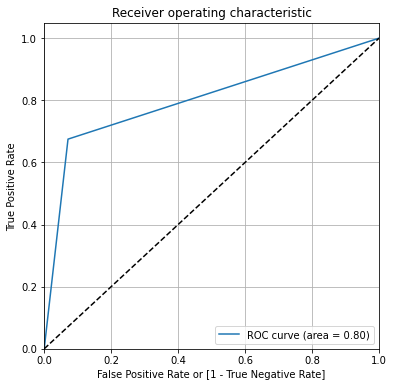

In [454]:
modelEvaluation(y_train,dt_best.predict(X_train),dt_best,X_train)

[[4215 1709]
 [  81  296]]
Accuracy Score ==> 0.7159181082367878
AUC Score ==> 0.7483291900769606
ROC_AUC Score ==> 0.81
Not-Churn Accuracy Rate:(Specificity) ==> 0.7115124915597569
Churn Accuracy Rate:(Sensitivity) ==> 0.7851458885941645


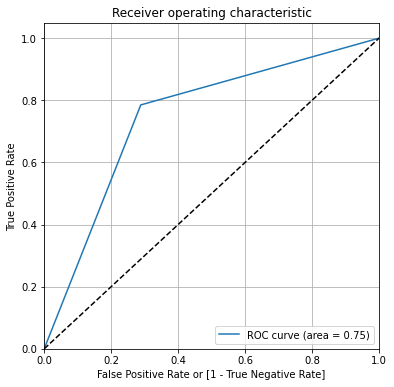

In [455]:
modelEvaluation(y_test,dt_best.predict(X_test),dt_best,X_test)

In [456]:
#With hyper parameter AUC scores are bit better,but default decision tree was better

## Random Forest

In [457]:
rf = RandomForestClassifier(n_estimators=10, 
                            max_depth=5, 
                            max_features=5, 
                            random_state=100, 
                            oob_score=True, 
                            class_weight=weights)

In [458]:
%%time
rf.fit(X_train, y_train)

Wall time: 327 ms


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       max_features=5, n_estimators=10, oob_score=True,
                       random_state=100)

In [459]:
rf.oob_score_

0.9113605442176871

[[12975   845]
 [  244   636]]
Accuracy Score ==> 0.9259183673469388
AUC Score ==> 0.8307920010524931
ROC_AUC Score ==> 0.92
Not-Churn Accuracy Rate:(Specificity) ==> 0.9388567293777135
Churn Accuracy Rate:(Sensitivity) ==> 0.7227272727272728


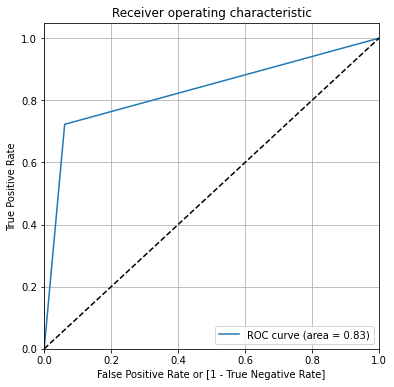

In [460]:
modelEvaluation(y_train,rf.predict(X_train),rf,X_train)

[[5533  391]
 [ 124  253]]
Accuracy Score ==> 0.9182669417552769
AUC Score ==> 0.8025424161393568
ROC_AUC Score ==> 0.88
Not-Churn Accuracy Rate:(Specificity) ==> 0.9339972991222147
Churn Accuracy Rate:(Sensitivity) ==> 0.6710875331564987


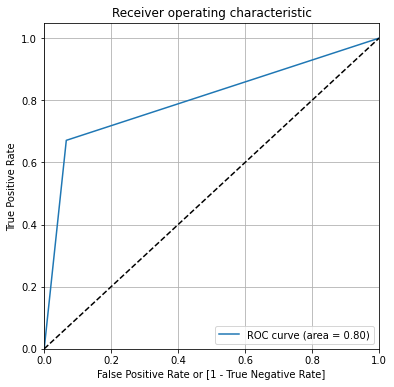

In [461]:
modelEvaluation(y_test,rf.predict(X_test),rf,X_test)

In [462]:
#Better metrics than other model ,except the sensitivity

In [463]:
#hyper parameter tuning
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'n_estimators': [10, 15, 20, 25, 30],
    'min_samples_split': range(10, 30, 50),
    'max_features': [5, 10, 15],
    'criterion': ["gini"]
}
# Create a based model
rf = RandomForestClassifier(class_weight=weights, random_state = 100)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1,verbose = 1)

In [464]:
#fit

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 225 candidates, totalling 900 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': [10, 20, 50, 100, 200],
                         'min_samples_split': range(10, 30, 50),
                         'n_estimators': [10, 15, 20, 25, 30]},
             verbose=1)

In [465]:
grid_search.best_score_

0.942721088435374

In [466]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=20,
                       max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=30, random_state=100)

In [467]:
#fit the model
rf_best.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=20,
                       max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=30, random_state=100)

[[13423   397]
 [  114   766]]
Accuracy Score ==> 0.9652380952380952
AUC Score ==> 0.9208640310485463
ROC_AUC Score ==> 0.99
Not-Churn Accuracy Rate:(Specificity) ==> 0.971273516642547
Churn Accuracy Rate:(Sensitivity) ==> 0.8704545454545455


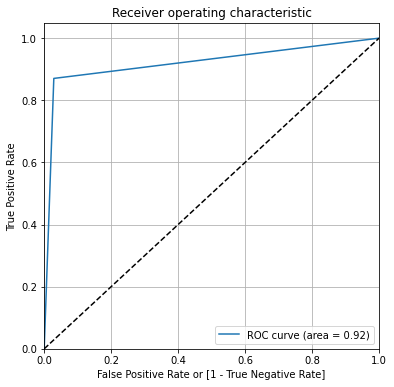

In [468]:
modelEvaluation(y_train,rf_best.predict(X_train),rf_best,X_train)

[[5720  204]
 [ 156  221]]
Accuracy Score ==> 0.9428662117124266
AUC Score ==> 0.7758853523947008
ROC_AUC Score ==> 0.88
Not-Churn Accuracy Rate:(Specificity) ==> 0.9655638082376773
Churn Accuracy Rate:(Sensitivity) ==> 0.5862068965517241


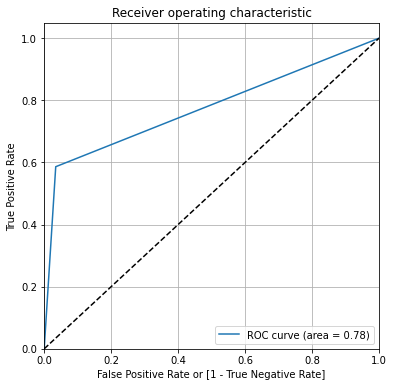

In [470]:
#predict on test
modelEvaluation(y_test,rf_best.predict(X_test),rf_best,X_test)

In [472]:
#Till now random forst with hyper parameter tuning is the best one

In [486]:
rf_best.feature_importances_

array([0.17065491, 0.11736204, 0.07161613, 0.0636704 , 0.09128642,
       0.00872952, 0.03987406, 0.04965172, 0.02717569, 0.02414791,
       0.01489056, 0.04852202, 0.00833905, 0.00832635, 0.01644819,
       0.02054142, 0.02138384, 0.02176355, 0.00542349, 0.01359245,
       0.01362777, 0.01299379, 0.01523355, 0.01096422, 0.01645556,
       0.01921828, 0.01836016, 0.01594094, 0.01523018, 0.01857585])

In [488]:
features=pd.DataFrame(data={"Feature":X_train.columns,
                            "importance":rf_best.feature_importances_})
features

Feature  importance
0         loc_ic_mou_8    0.170655
1       total_ic_mou_8    0.117362
2        roam_og_mou_8    0.071616
3     total_rech_amt_8    0.063670
4     loc_ic_t2m_mou_8    0.091286
5     loc_ic_t2t_mou_8    0.008730
6       total_og_mou_8    0.039874
7        roam_ic_mou_8    0.049652
8               arpu_8    0.027176
9     loc_og_t2m_mou_8    0.024148
10        loc_og_mou_8    0.014891
11  av_rech_amt_data_8    0.048522
12    loc_og_t2t_mou_8    0.008339
13    loc_ic_t2f_mou_8    0.008326
14         vol_2g_mb_8    0.016448
15              arpu_7    0.020541
16                 aon    0.021384
17    total_rech_amt_7    0.021764
18   total_rech_data_8    0.005423
19        std_ic_mou_8    0.013592
20              arpu_6    0.013628
21        loc_ic_mou_7    0.012994
22      total_og_mou_7    0.015234
23    std_ic_t2m_mou_8    0.010964
24     max_rech_data_8    0.016456
25        std_og_mou_7    0.019218
26      total_ic_mou_7    0.018360
27                  id    0.015941
28    total_rech_amt_6    0.015230
29    loc_ic_t2m_mou_6    0.018576

In [474]:
X_train.shape

(14700, 30)

In [484]:
df_test=df_test[list(X_train.columns)]

In [489]:
op=rf_best.predict(df_test)

output=pd.DataFrame(data={"Id":df_test["id"],"churn_probability":op})

output.to_csv('submission.csv',index=False)


In [492]:
X_train.columns

Index(['loc_ic_mou_8', 'total_ic_mou_8', 'roam_og_mou_8', 'total_rech_amt_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_8', 'total_og_mou_8',
       'roam_ic_mou_8', 'arpu_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'av_rech_amt_data_8', 'loc_og_t2t_mou_8', 'loc_ic_t2f_mou_8',
       'vol_2g_mb_8', 'arpu_7', 'aon', 'total_rech_amt_7', 'total_rech_data_8',
       'std_ic_mou_8', 'arpu_6', 'loc_ic_mou_7', 'total_og_mou_7',
       'std_ic_t2m_mou_8', 'max_rech_data_8', 'std_og_mou_7', 'total_ic_mou_7',
       'id', 'total_rech_amt_6', 'loc_ic_t2m_mou_6'],
      dtype='object')

## 4. Conclusion :

We have succesfully built a model which has a decent accuracy as well as decent AUC score .Checked few other metrics too before concluding our final model.

1. We have selected a random forest model with hyperparameter tuning.
2. Judge the model based on AUC score,sensitivity and specificity apart from accuracy score
    *  Accuracy Score ==> 0.9652380952380952
    *  AUC Score ==> 0.9208640310485463
    * ROC_AUC Score ==> 0.99
    * Not-Churn Accuracy Rate:(Specificity) ==> 0.971273516642547
    * Churn Accuracy Rate:(Sensitivity) ==> 0.8704545454545455
3. Below are the impotance top features which highly affects the model prediction
    'loc_ic_mou_8', 'total_ic_mou_8', 'roam_og_mou_8', 'total_rech_amt_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_8', 'total_og_mou_8',
       'roam_ic_mou_8', 'arpu_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'av_rech_amt_data_8', 'loc_og_t2t_mou_8', 'loc_ic_t2f_mou_8',
       'vol_2g_mb_8', 'arpu_7', 'aon', 'total_rech_amt_7', 'total_rech_data_8',
       'std_ic_mou_8', 'arpu_6', 'loc_ic_mou_7', 'total_og_mou_7',
       'std_ic_t2m_mou_8', 'max_rech_data_8', 'std_og_mou_7', 'total_ic_mou_7',
       'id', 'total_rech_amt_6', 'loc_ic_t2m_mou_6'

    